<a href="https://colab.research.google.com/github/tahirp/car-price-drivers-analysis/blob/main/used_car_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding


#### Data Problem Definition:

**The business problem of identifying key drivers for used car prices can be reframed as a supervised machine learning regression task.**

**Target Variable:** The primary target variable is the `price` of a used car, which is a continuous numerical value.

**Potential Input Features:** Key features that are expected to influence the car price include: `region`, `year`, `manufacturer`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `title_status`, `transmission`, `drive`, `size`, `type`, `paint_color`, and `state`.

**Machine Learning Task:** The objective is to build a predictive model that can estimate the `price` of a used car based on its characteristics. This is a **regression** problem, where the goal is to predict a continuous output variable.


### Data Understanding


In [125]:
!pip install category_encoders

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [127]:
cars = pd.read_csv('data/vehicles.csv')

In [128]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [129]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [130]:
cars.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [131]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


# **Data Description**
*   `id`: A unique identifier for each car listing.
*   `region`: The geographical region where the car is listed for sale.
*   `price`: The advertised price of the car.
*   `year`: The manufacturing year of the car.
*   `manufacturer`: The brand or maker of the car.
*   `model`: The specific model of the car.
*   `condition`: The reported condition of the car (e.g., excellent, good, fair).
*   `cylinders`: The number of cylinders in the car's engine.
*   `fuel`: The type of fuel the car uses (e.g., gas, diesel, electric).
*   `odometer`: The total distance the car has traveled, in miles.
*   `title_status`: The legal status of the car's title (e.g., clean, salvage).
*   `transmission`: The type of transmission in the car (e.g., automatic, manual).
*   `VIN`: The Vehicle Identification Number.
*   `drive`: The drivetrain type of the car (e.g., fwd, rwd, 4wd).
*   `size`: The physical size classification of the car (e.g., compact, full-size).
*   `type`: The body type of the car (e.g., sedan, SUV, truck).
*   `paint_color`: The exterior color of the car.
*   `state`: The state where the car is located or listed.

**Missing values count**

Calculate the total number of missing values (NaNs) for each column in the `cars` DataFrame using `cars.isnull().sum()`.

In [132]:
missing_values_count = cars.isnull().sum()
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


**Calculate Percentage of Missing Values**

Divide the total missing values by the total number of rows in the DataFrame (`len(cars)`) and multiply by 100 to get the percentage of missing values for each column, and sort.

In [133]:
missing_values_count = cars.isnull().sum()
total_rows = len(cars)
missing_values_percentage = (missing_values_count / total_rows) * 100

missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)

print("Percentage of missing values per column (sorted descending):")
print(missing_values_percentage_sorted)

Percentage of missing values per column (sorted descending):
size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
region           0.000000
id               0.000000
price            0.000000
state            0.000000
dtype: float64


### Columns Requiring Specific Handling

Based on the sorted percentages of missing values, the following columns require significant attention during data preparation:

*   **`size` (71.77%)**: This column has a very high percentage of missing values, making it difficult to impute reliably. It might need to be dropped or handled with a specific strategy like creating a 'missing' category if its information is deemed critical.
*   **`cylinders` (41.62%)**, **`condition` (40.79%)**, **`VIN` (37.73%)**, **`drive` (30.59%)**, **`paint_color` (30.50%)**, **`type` (21.75%)**: These columns also have a substantial amount of missing data (above 20%). For categorical features like `cylinders`, `condition`, `drive`, `paint_color`, and `type`, imputation strategies could include:
    *   **Mode Imputation**: Replacing missing values with the most frequent category.
    *   **Creating a 'Missing' Category**: Treating missing values as a separate category, which can be useful if missingness itself is informative.
    *   **Predictive Imputation**: Using other features to predict missing values (more complex).
    For `VIN`, given its nature as a unique identifier, and the high missing rate, it is likely not suitable for imputation and might be dropped if not directly used for modeling or if an alternative identifier is present.

*   **`manufacturer` (4.13%)**, **`title_status` (1.93%)**, **`model` (1.24%)**, **`odometer` (1.03%)**, **`fuel` (0.71%)**, **`transmission` (0.60%)**, **`year` (0.28%)**: These columns have a relatively low percentage of missing values. For these, common imputation techniques such as:
    *   **Mode Imputation** (for categorical: `manufacturer`, `title_status`, `model`, `fuel`, `transmission`)
    *   **Mean/Median Imputation** (for numerical: `odometer`, `year`)
    *   Small percentage of missing values could also potentially be dropped, if the impact on the dataset size is negligible.

Columns with 0% missing values (`id`, `region`, `price`, `state`) do not require any specific handling for missing data.

# Unique Values

Examine the unique values in categorical columns to understand their cardinality (number of unique entries) and identify any inconsistencies or potential data entry errors.

In [134]:
# Count the number of unique values for each column
print("Number of unique values per column:")
print(cars.nunique())

Number of unique values per column:
id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


# Unique Value View

Unique values count in all the columns except Id, VIN, Odometer, model, price, and region. These are skipped because of their huge number that suppresses others.

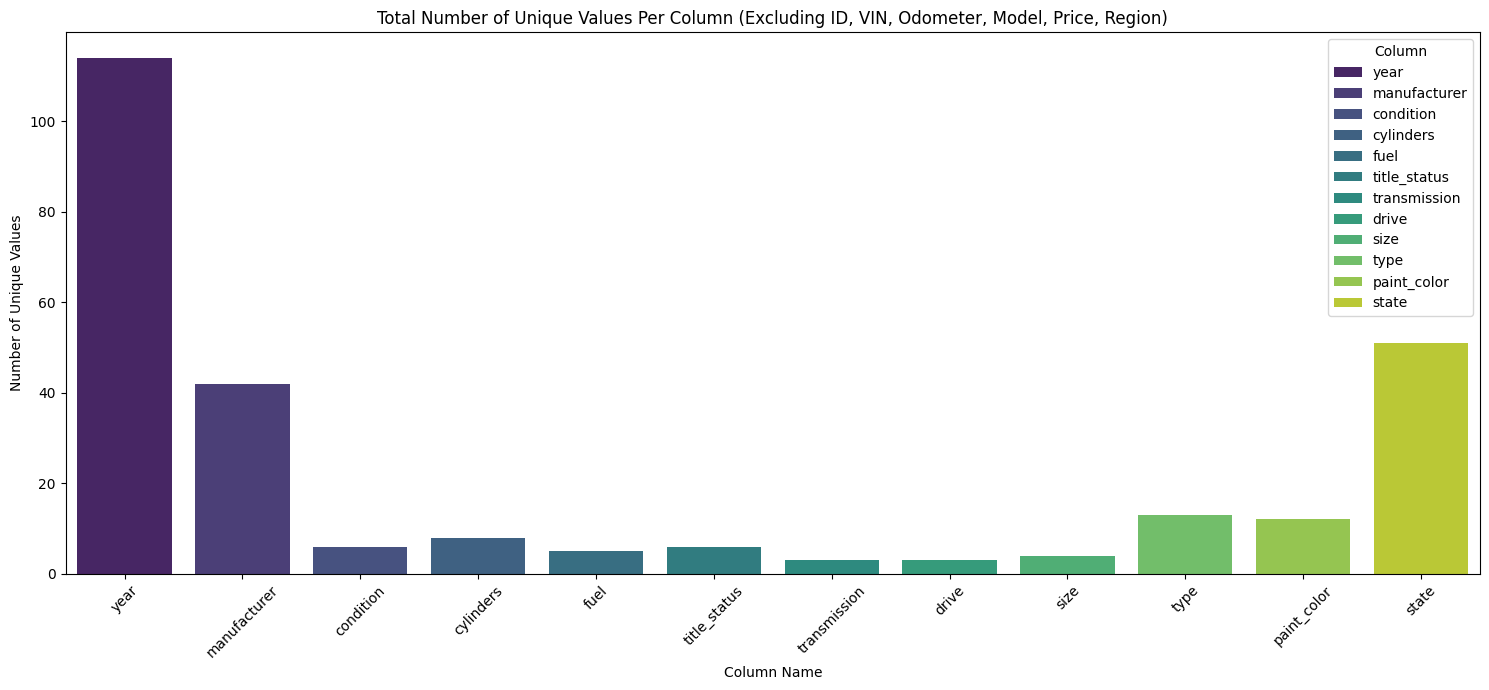

<Figure size 640x480 with 0 Axes>

In [135]:
unique_counts = cars.nunique()
unique_counts_df = unique_counts.reset_index()
unique_counts_df.columns = ['Column', 'Unique_Count']

# Columns to exclude from the plot
columns_to_exclude = ['id', 'VIN', 'odometer', 'model', 'price', 'region']

# Exclude specified columns using isin()
unique_counts_df = unique_counts_df[~unique_counts_df['Column'].isin(columns_to_exclude)]


plt.figure(figsize=(15, 7))
sns.barplot(x='Column', y='Unique_Count', data=unique_counts_df, hue='Column', legend=True, palette='viridis')
plt.title('Total Number of Unique Values Per Column (Excluding ID, VIN, Odometer, Model, Price, Region)')
plt.xlabel('Column Name')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/unique_count.png')

### Visualize Unique Value Counts Across All Columns

Plot shows the number of unique values for each column, which helps in understanding feature cardinality and identifying columns that might be suitable for one-hot encoding versus those that are too granular (like IDs or VINs if they were still present and unique for every row).

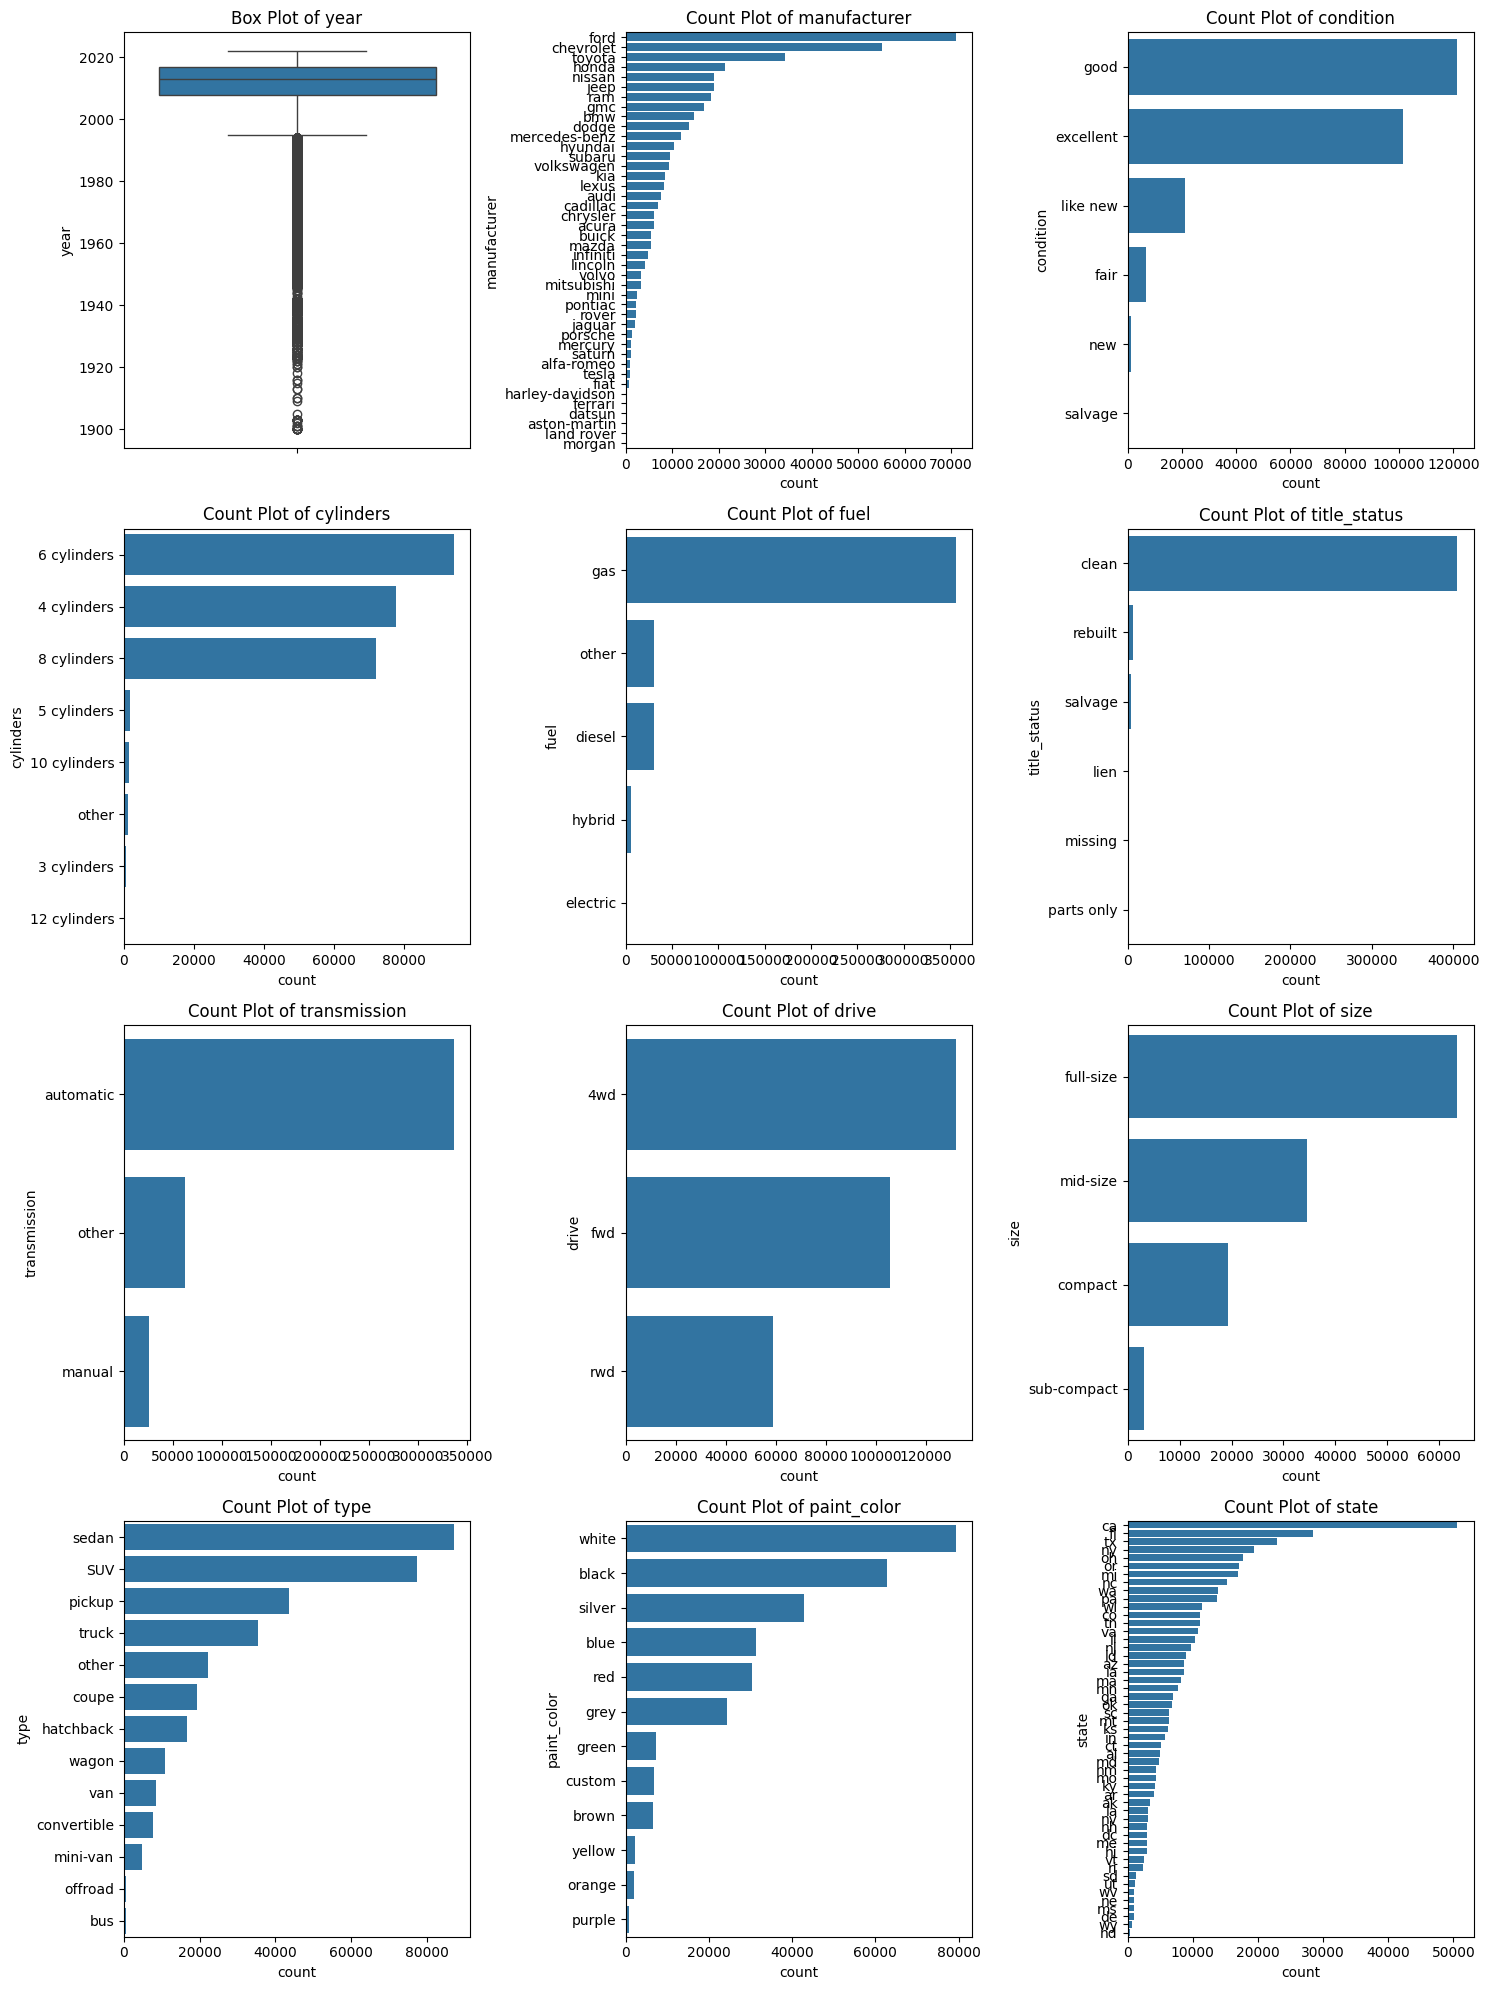

<Figure size 640x480 with 0 Axes>

In [136]:
# Determine the number of rows and columns for subplots
columns_to_display_unique_values = unique_counts_df['Column'].tolist()

n_cols = 3
n_rows = (len(columns_to_display_unique_values) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(columns_to_display_unique_values):
    plt.subplot(n_rows, n_cols, i + 1)

    # Boxplot for numerical columns
    if pd.api.types.is_numeric_dtype(cars[col]):
        sns.boxplot(data=cars, y=col)
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)

    #countplot for non-numerical columns
    else:
        sns.countplot(data=cars, y=col, order=cars[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.ylabel(col)

plt.tight_layout()
plt.show()
plt.savefig('images/unique_value_count.png')

# **Unique Values Description**

- `id`: Sample values: [7222695916, 7218891961, 7221797935, 7222270760, 7210384030]
- `region`: Sample values: ['prescott', 'fayetteville', 'florida keys', 'worcester / central MA', 'greensboro']
- `price`: Sample values: [6000, 11900, 21000, 1500, 4900]
- `year`: Sample values: [nan, 2019., 2020., 2018., 2017.]
- `manufacturer`: Sample values: [nan, 'nissan', 'ford', 'chevrolet', 'toyota']
- `model`: Sample values: [nan, 'maxima s sedan 4d', 's60 t5 momentum sedan 4d', 'xt4 sport suv 4d', 'es 350 sedan 4d']
- `condition`: Unique values: [nan, 'good', 'excellent', 'fair', 'new', 'like new', 'salvage']
- `cylinders`: Unique values: [nan, '6 cylinders', '4 cylinders', '8 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders']
- `fuel`: Unique values: [nan, 'gas', 'other', 'diesel', 'hybrid', 'electric']
- `odometer`: Sample values: [nan, 32226., 12029., 4174., 30112.]
- `title_status`: Unique values: [nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
- `transmission`: Unique values: [nan, 'other', 'automatic', 'manual']
- `VIN`: Sample values: [nan, '1N4AA6AV6KC367801', '7JR102FKXLG042696', '1GYFZFR46LF088296', '58ABK1GG4JU103853']
- `drive`: Unique values: [nan, 'fwd', 'rwd', '4wd']
- `size`: Unique values: [nan, 'full-size', 'mid-size', 'compact', 'sub-compact']
- `type`: Unique values: [nan, 'sedan', 'hatchback', 'coupe', 'other', 'truck', 'mini-van', 'van', 'SUV', 'bus', 'offroad', 'pickup', 'wagon', 'convertible']
- `paint_color`: Unique values: [nan, 'red', 'white', 'silver', 'blue', 'grey', 'black', 'brown', 'custom', 'green', 'orange', 'purple', 'yellow']
- `state`: Sample values: ['az', 'ar', 'fl', 'ma', 'nc']

**Subplot for feature Fuel**

Subplot for fuel variations for gas vs diesel

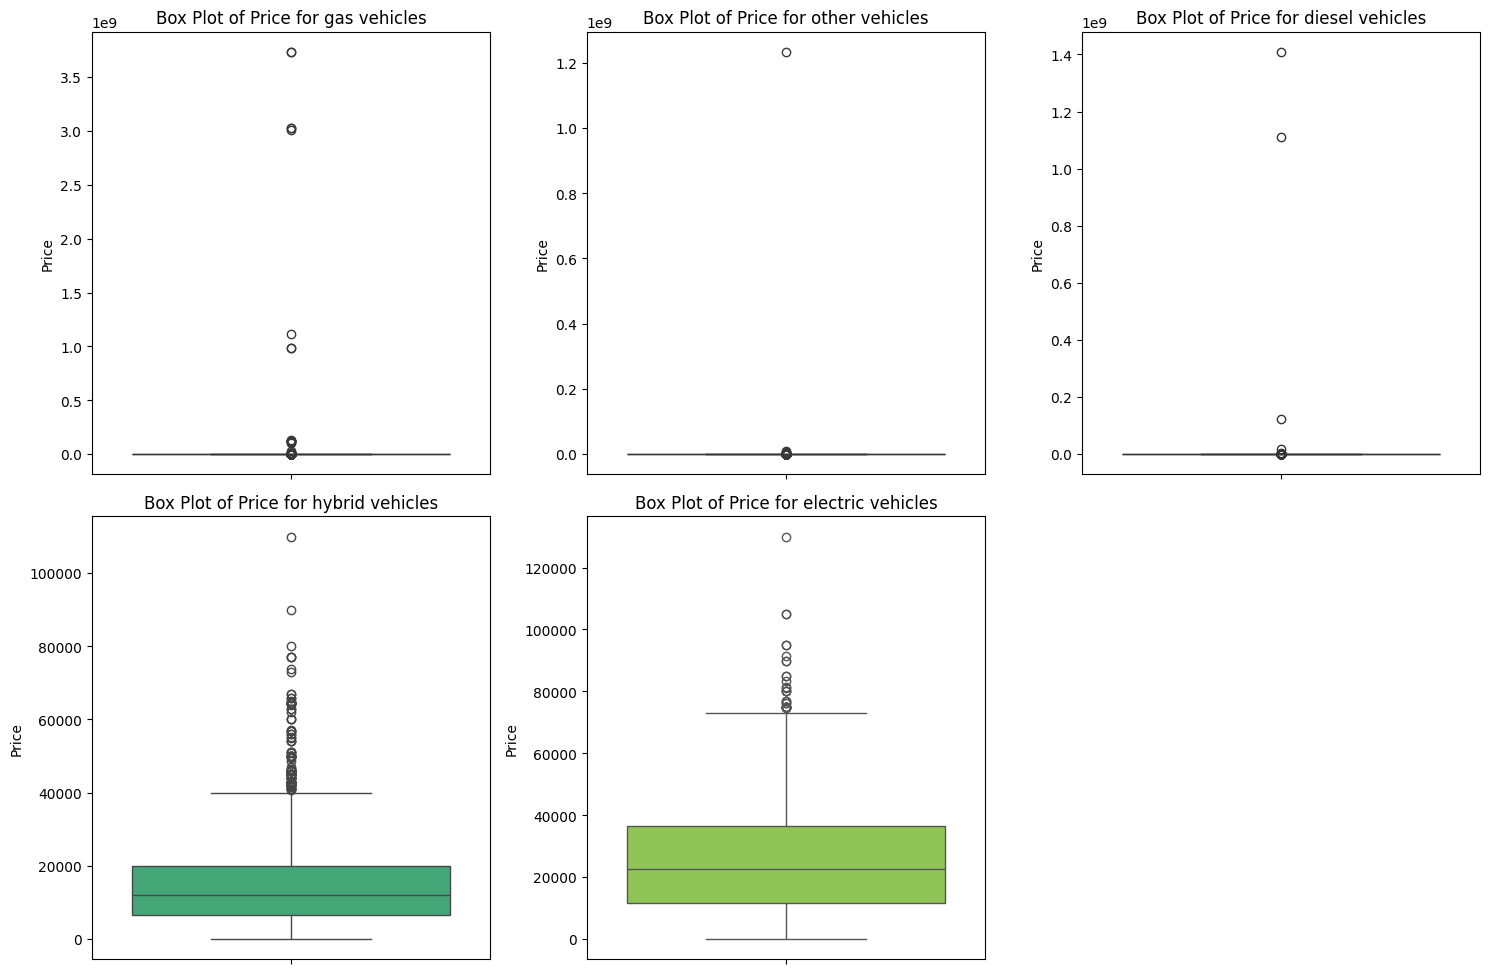

<Figure size 640x480 with 0 Axes>

In [137]:
n_cols = 3
unique_fuel_types = cars['fuel'].dropna().unique()
n_rows = (len(unique_fuel_types) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
cars_filtered_for_price = cars.dropna(subset=['fuel', 'price'])

for i, fuel_type in enumerate(unique_fuel_types):
    plt.subplot(n_rows, n_cols, i + 1)

    subset_data = cars_filtered_for_price[cars_filtered_for_price['fuel'] == fuel_type]
    sns.boxplot(data=subset_data, y='price', color=sns.color_palette('viridis', len(unique_fuel_types))[i])

    plt.title(f'Box Plot of Price for {fuel_type} vehicles')
    plt.ylabel('Price')
    plt.xlabel('')

plt.tight_layout()
plt.show()
plt.savefig('images/fuel_subplot.png')

**Subplot for feature Type**

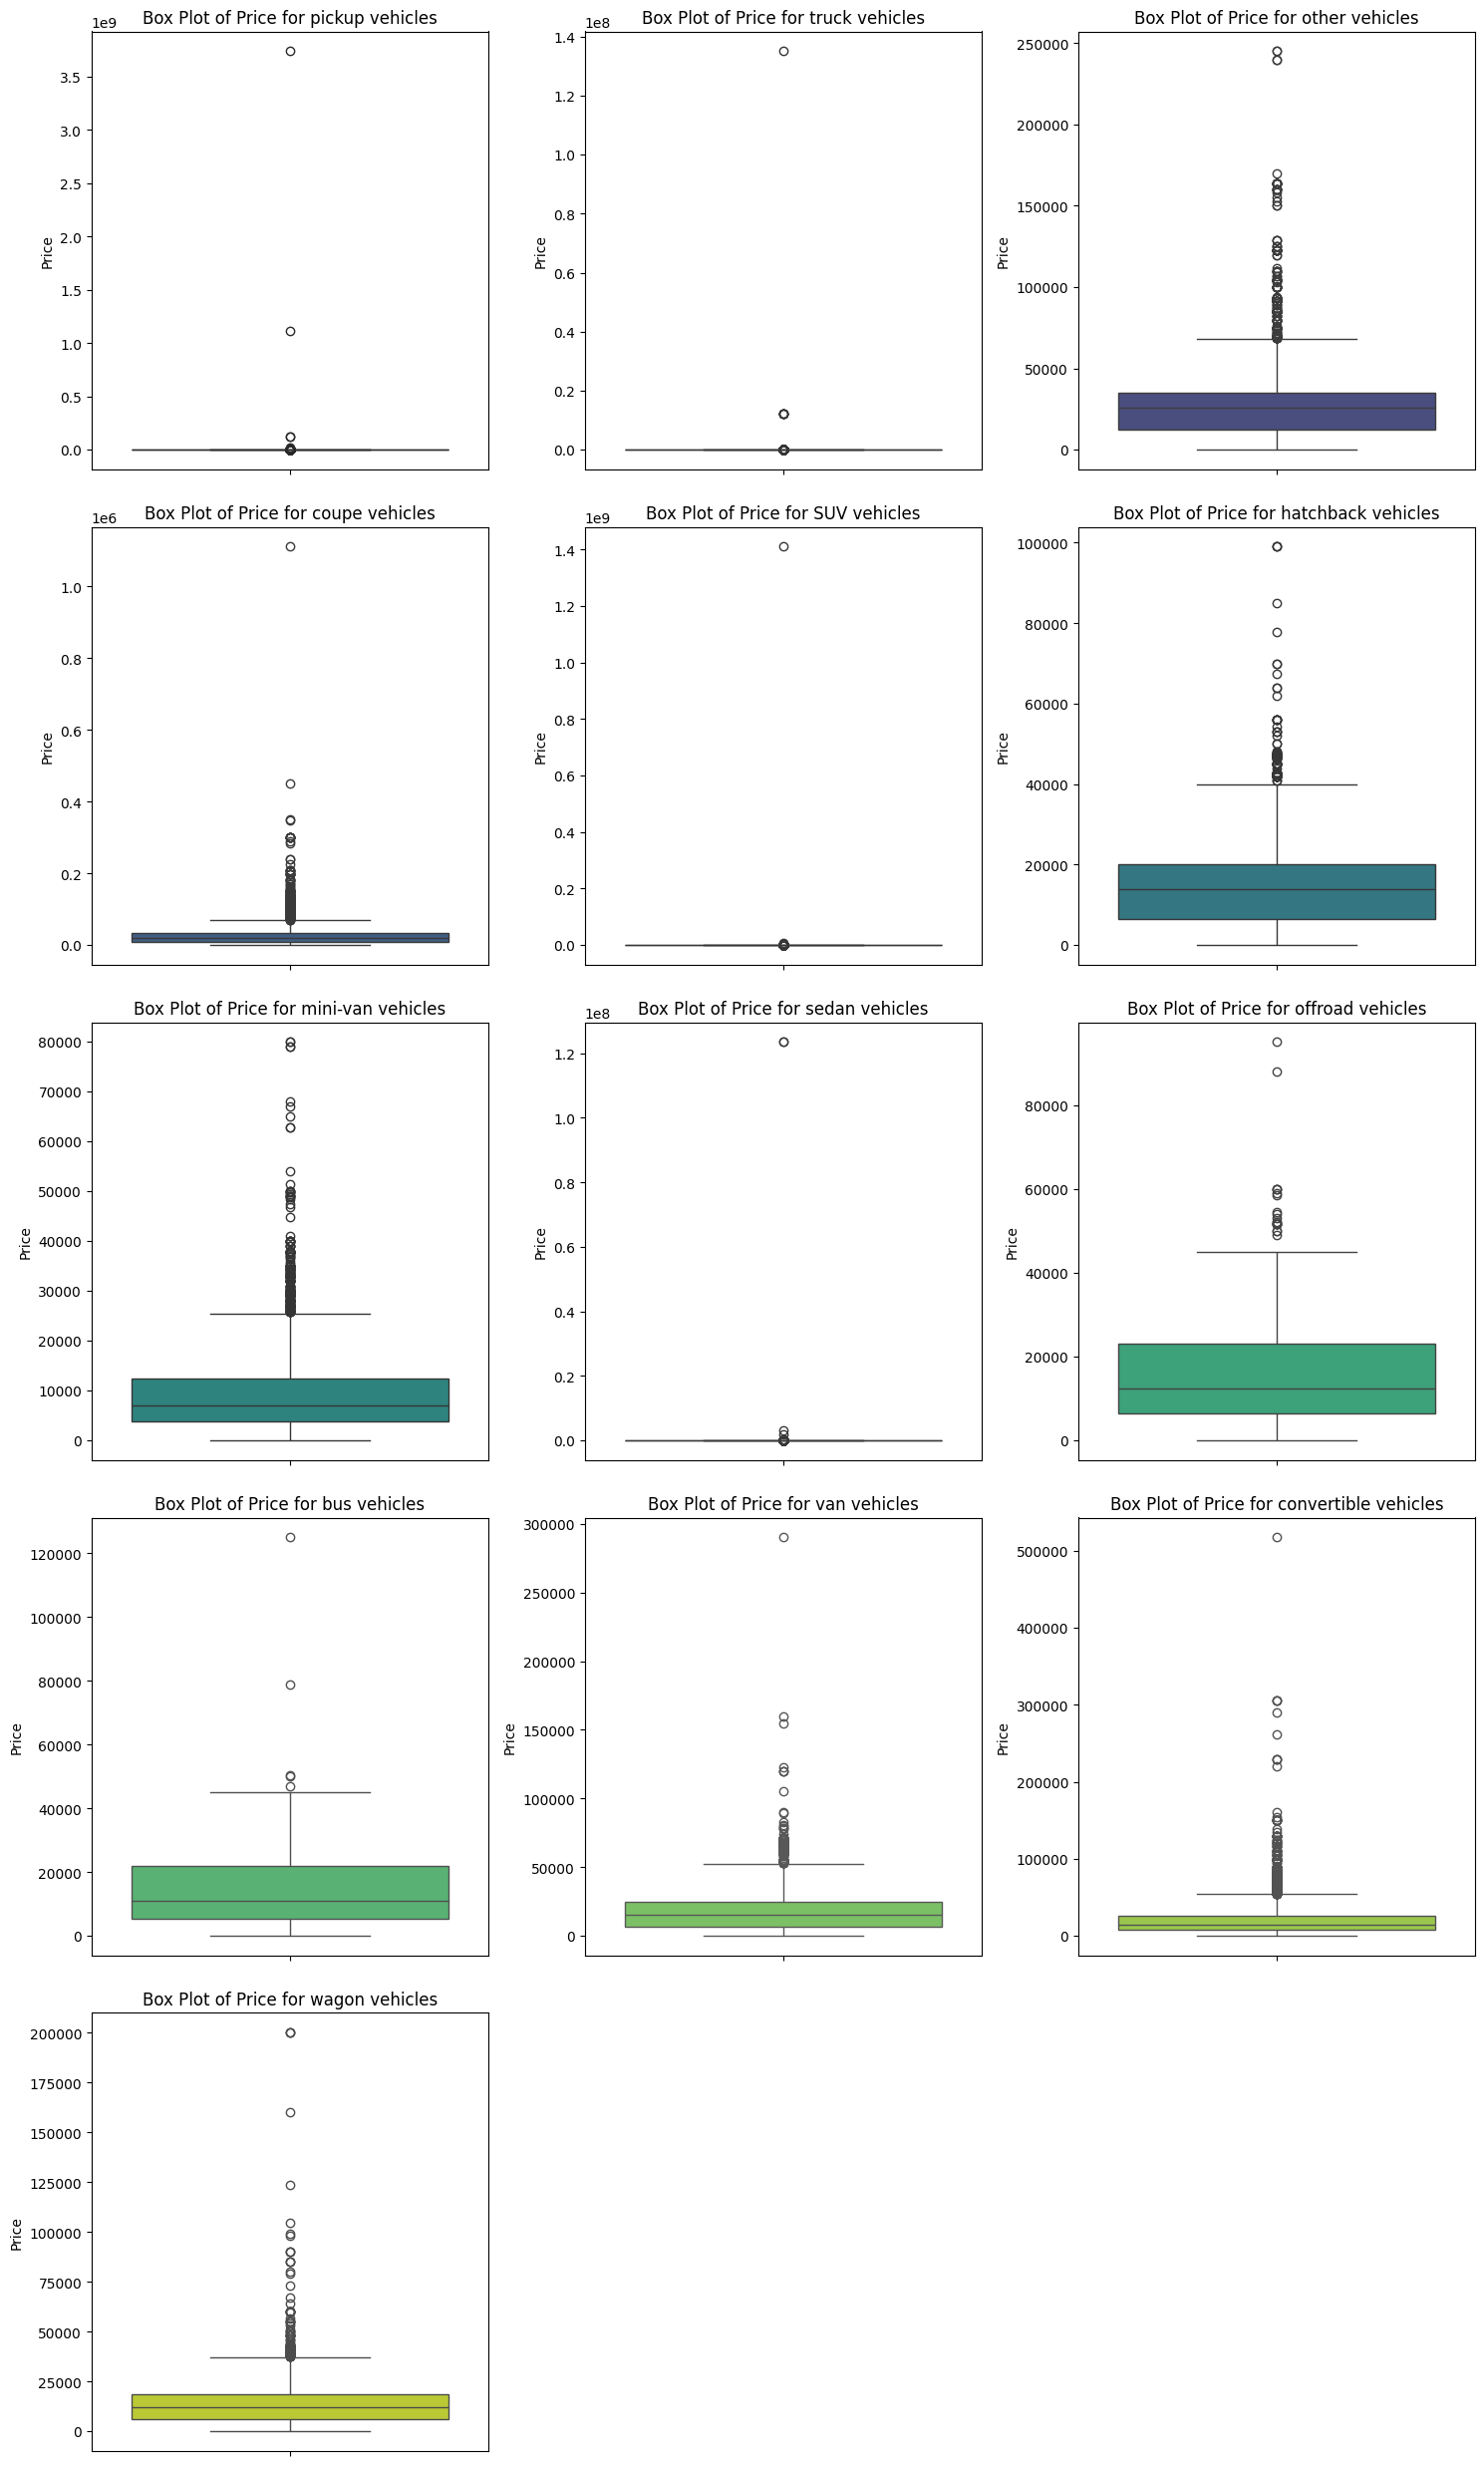

<Figure size 640x480 with 0 Axes>

In [138]:
n_cols = 3
unique_types = cars['type'].dropna().unique()
n_rows = (len(unique_types) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
cars_filtered_for_price = cars.dropna(subset=['type', 'price'])

for i, car_type in enumerate(unique_types):
    plt.subplot(n_rows, n_cols, i + 1)

    subset_data = cars_filtered_for_price[cars_filtered_for_price['type'] == car_type]
    sns.boxplot(data=subset_data, y='price', color=sns.color_palette('viridis', len(unique_types))[i])

    plt.title(f'Box Plot of Price for {car_type} vehicles')
    plt.ylabel('Price')
    plt.xlabel('')

plt.tight_layout()
plt.show()
plt.savefig('images/type_subplot.png')

**Subplot for feature Condition**

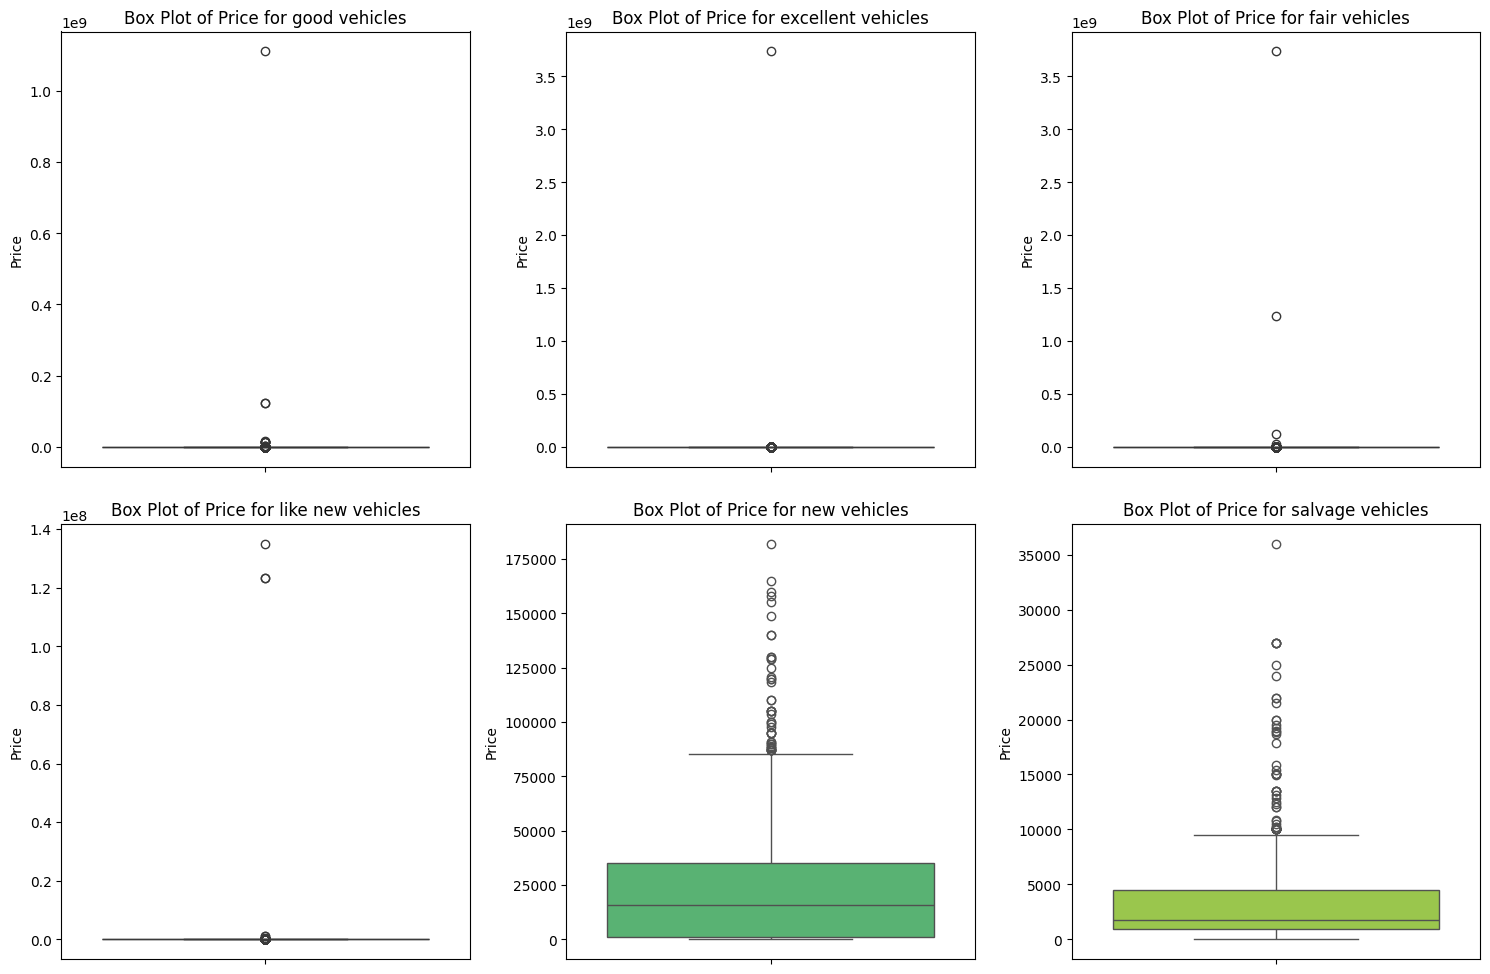

<Figure size 640x480 with 0 Axes>

In [139]:
n_cols = 3
unique_condition_types = cars['condition'].dropna().unique()
n_rows = (len(unique_condition_types) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
cars_filtered_for_price = cars.dropna(subset=['condition', 'price'])

for i, condition_type in enumerate(unique_condition_types):
    plt.subplot(n_rows, n_cols, i + 1)

    subset_data = cars_filtered_for_price[cars_filtered_for_price['condition'] == condition_type]
    sns.boxplot(data=subset_data, y='price', color=sns.color_palette('viridis', len(unique_condition_types))[i])

    plt.title(f'Box Plot of Price for {condition_type} vehicles')
    plt.ylabel('Price')
    plt.xlabel('')

plt.tight_layout()
plt.show()
plt.savefig('images/condition_subplot.png')

**Subplot for feature Transmission**

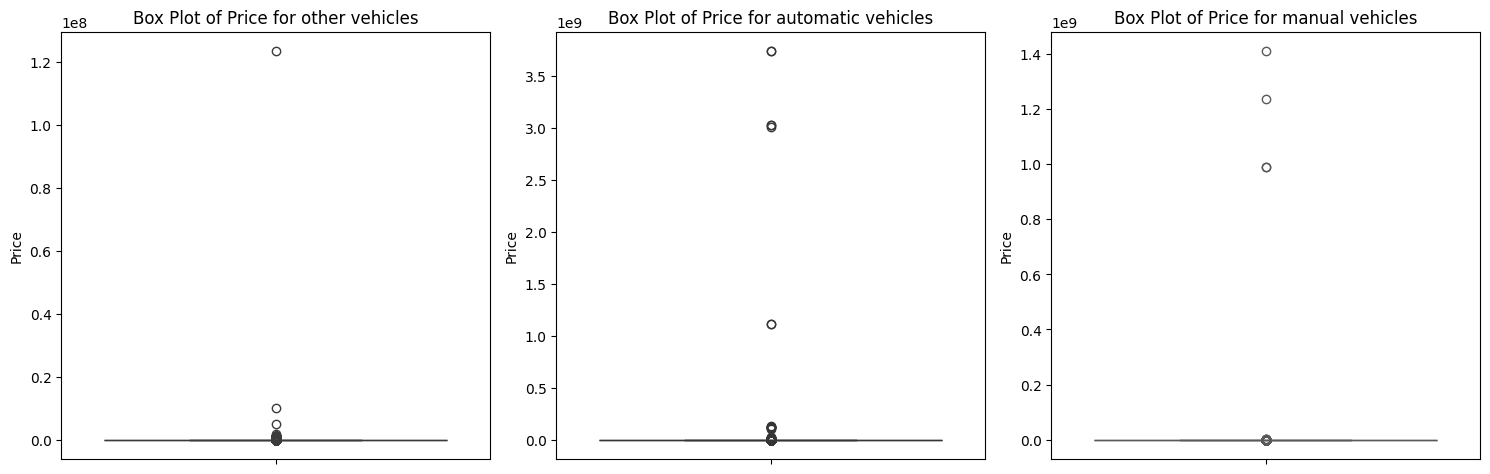

<Figure size 640x480 with 0 Axes>

In [140]:
n_cols = 3
unique_transmission_types = cars['transmission'].dropna().unique()
n_rows = (len(unique_transmission_types) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))
cars_filtered_for_price = cars.dropna(subset=['transmission', 'price'])

for i, trans_type in enumerate(unique_transmission_types):
    plt.subplot(n_rows, n_cols, i + 1)

    subset_data = cars_filtered_for_price[cars_filtered_for_price['transmission'] == trans_type]
    sns.boxplot(data=subset_data, y='price', color=sns.color_palette('viridis', len(unique_transmission_types))[i])

    plt.title(f'Box Plot of Price for {trans_type} vehicles')
    plt.ylabel('Price')
    plt.xlabel('')

plt.tight_layout()
plt.show()
plt.savefig('images/transmission_subplot.png')

# **Analysis of Numerical Columns**

Visualize the distribution of numerical features to understand their shape, range and frequency of values

1. Distribution of Car Prices
2. Distribution of Manufacturing Year
3. Distriubtion of Odometer Reading

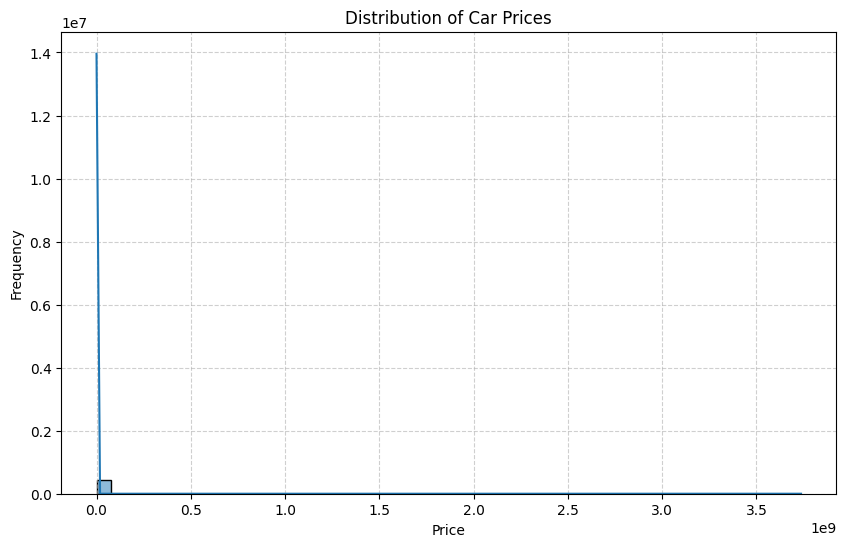

<Figure size 640x480 with 0 Axes>

In [141]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['price'].dropna(), bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/price_distribution.png')

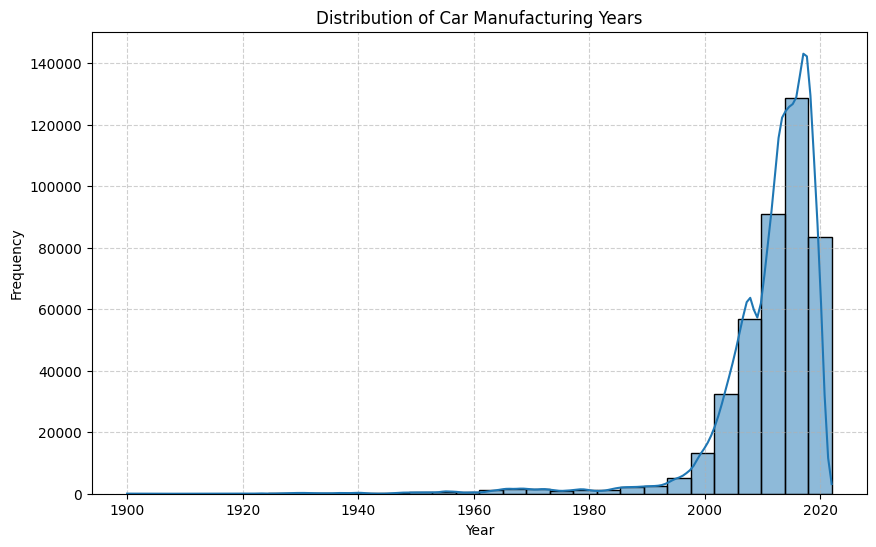

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Car Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/year_distribution.png')

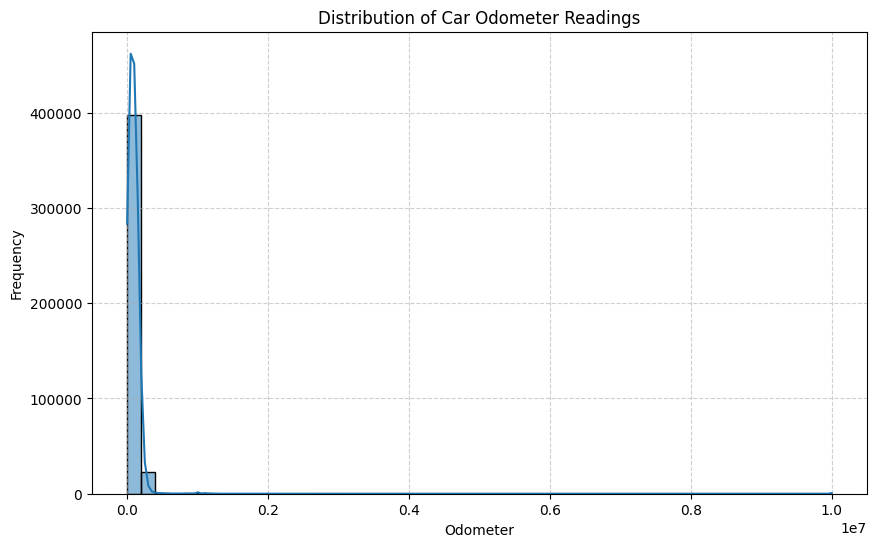

<Figure size 640x480 with 0 Axes>

In [143]:

plt.figure(figsize=(10, 6))
sns.histplot(cars['odometer'].dropna(), bins=50, kde=True)
plt.title('Distribution of Car Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/odometer_distribution.png')

# **Outlier of Numerical Columns**

Identify potential outliers and visualize the spread and central tendency across different categories


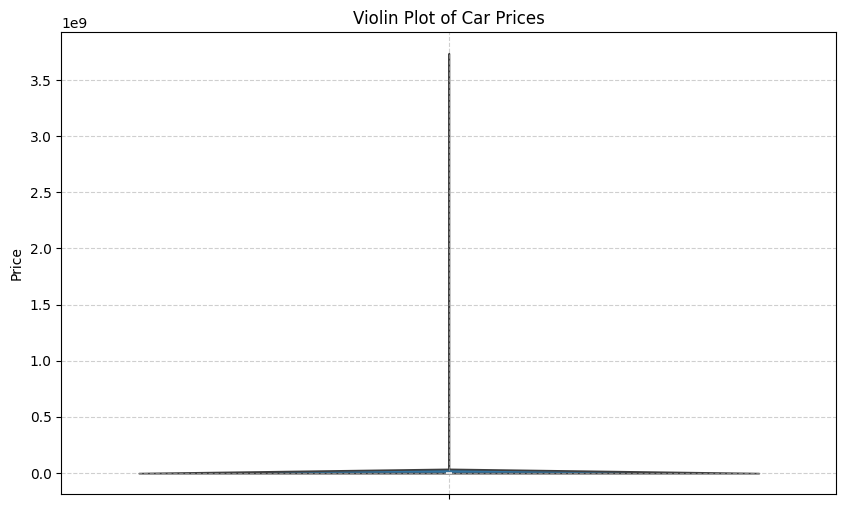

<Figure size 640x480 with 0 Axes>

In [144]:

plt.figure(figsize=(10, 6))
sns.violinplot(y=cars['price'].dropna())
plt.title('Violin Plot of Car Prices')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/price_outliers.png')

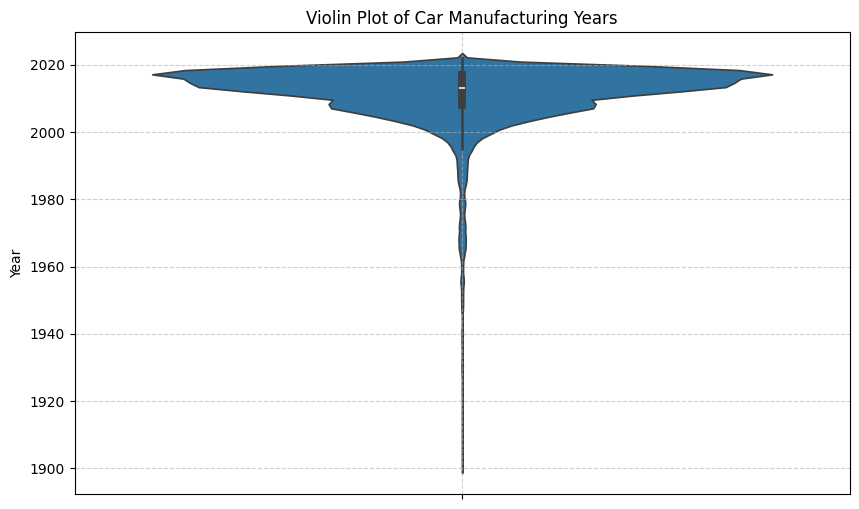

<Figure size 640x480 with 0 Axes>

In [145]:

plt.figure(figsize=(10, 6))
sns.violinplot(y=cars['year'].dropna())
plt.title('Violin Plot of Car Manufacturing Years')
plt.ylabel('Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/year_outliers.png')

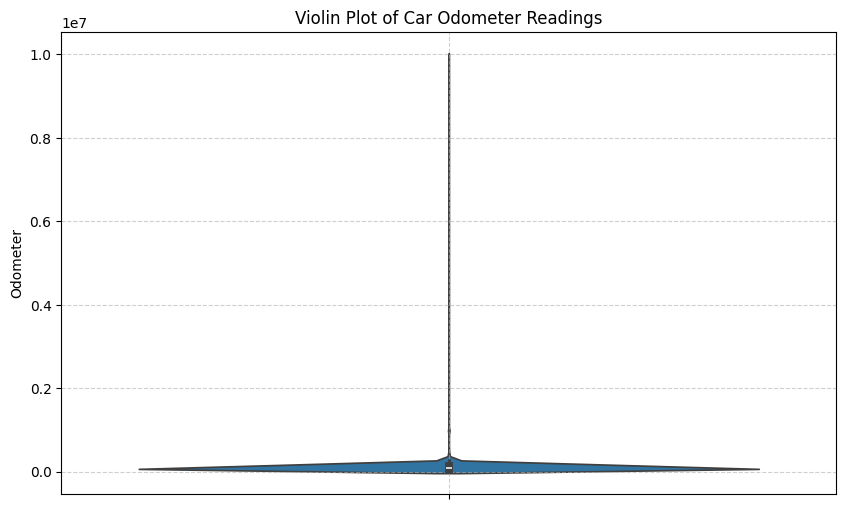

<Figure size 640x480 with 0 Axes>

In [146]:

plt.figure(figsize=(10, 6))
sns.violinplot(y=cars['odometer'].dropna())
plt.title('Violin Plot of Car Odometer Readings')
plt.ylabel('Odometer')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/odometer_outliers.png')

# **Relationship between price and categorical features**

Relationship between price and categorical columns excluding model, state, and region due to huge number of unique values.

Analyzing average price per category for remaining categorical columns:



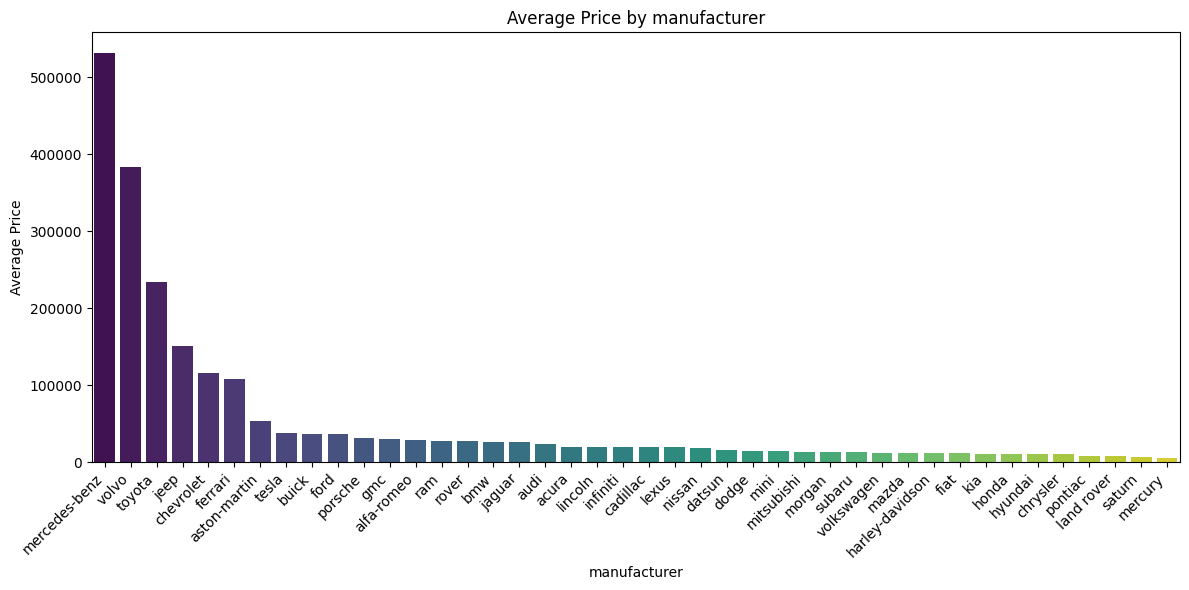

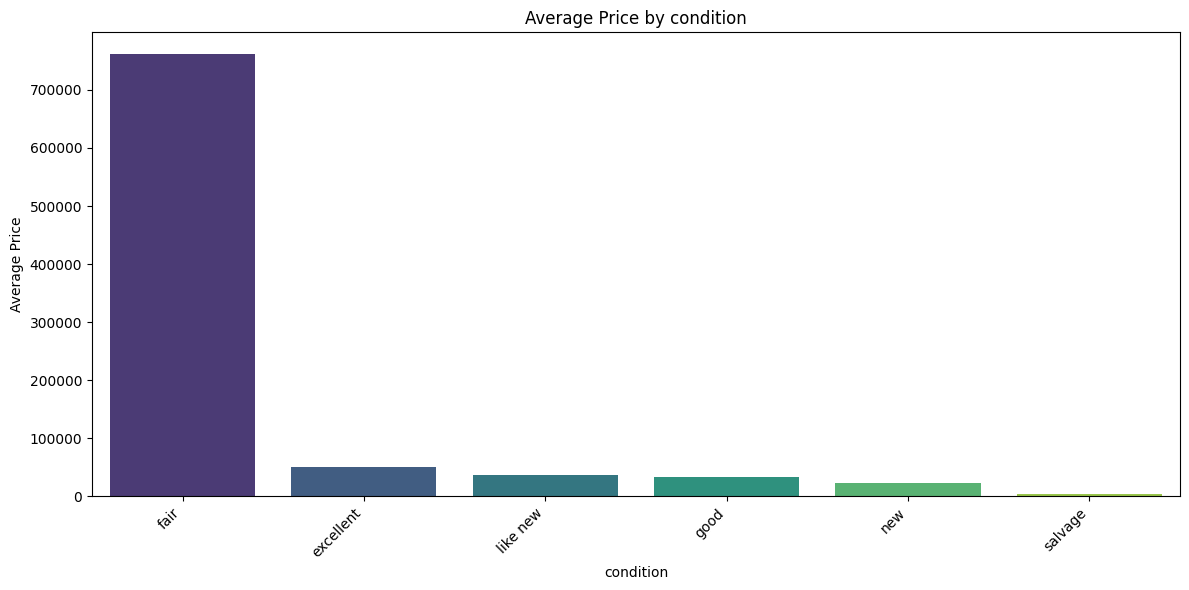

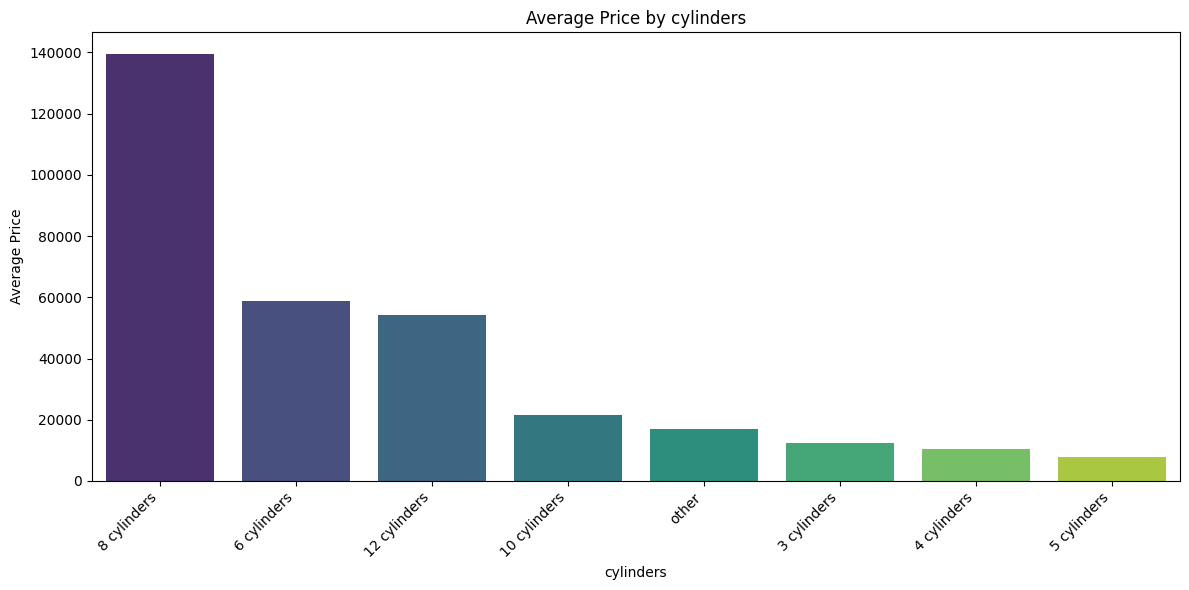

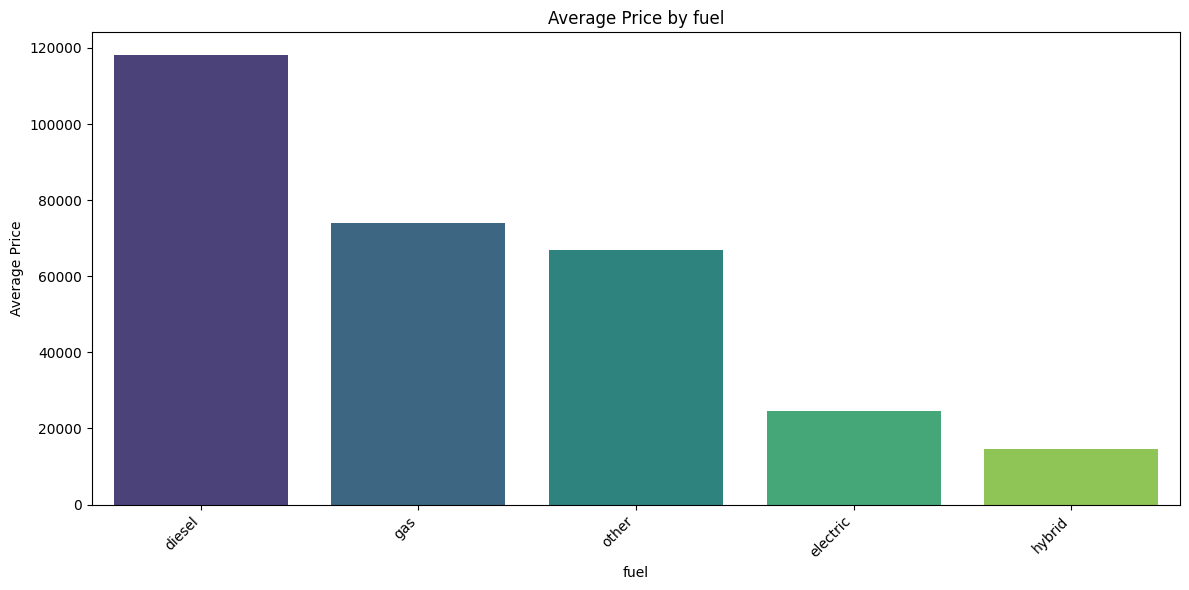

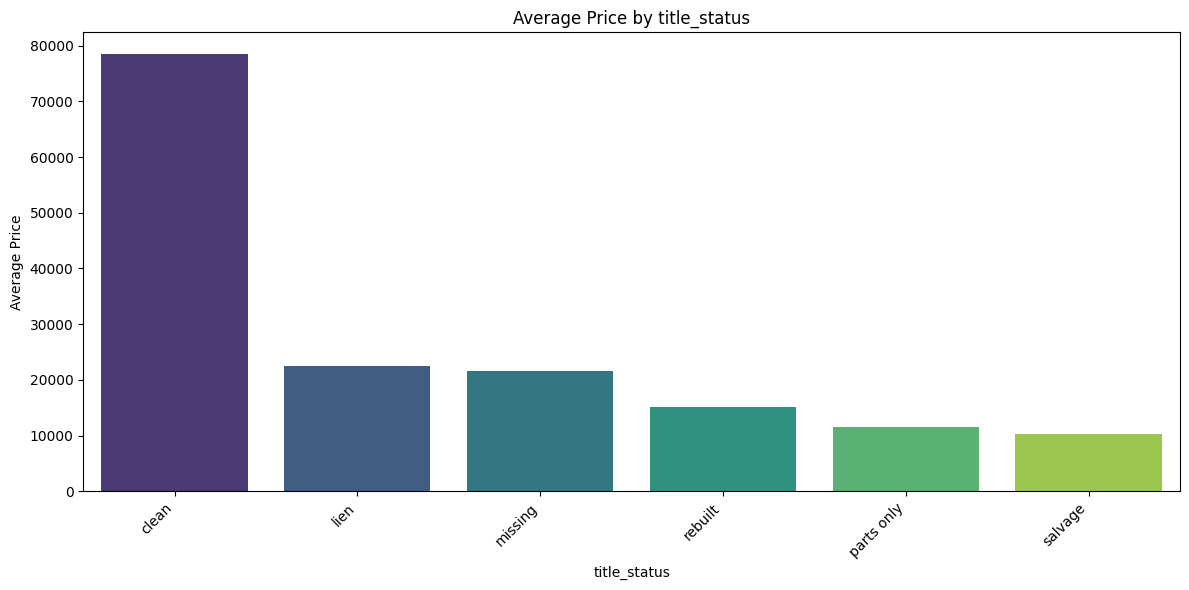

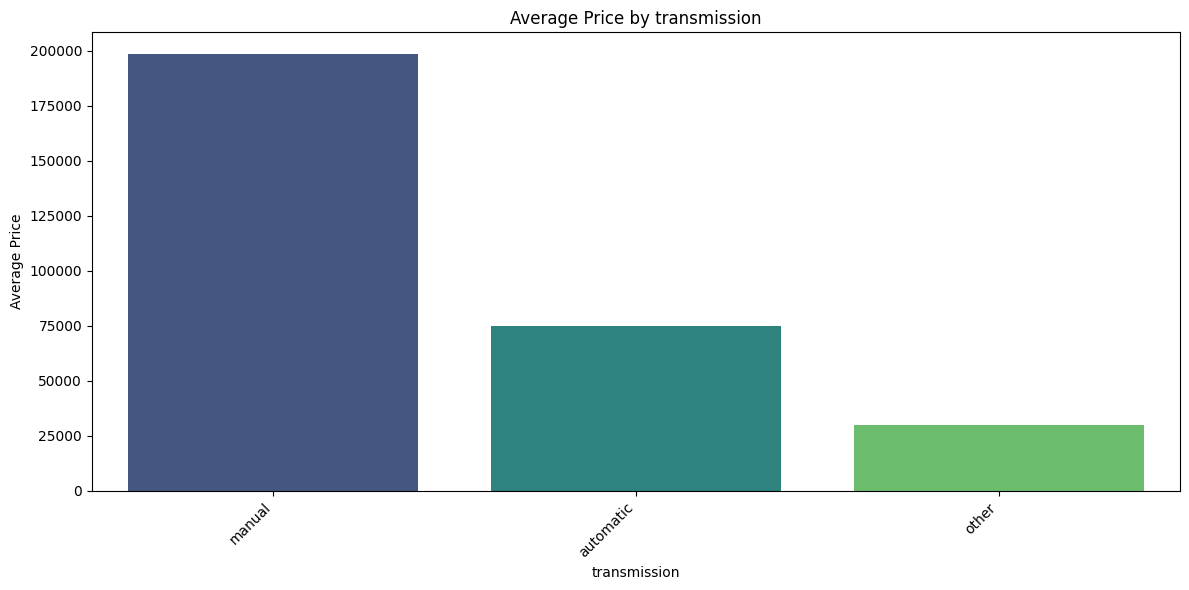

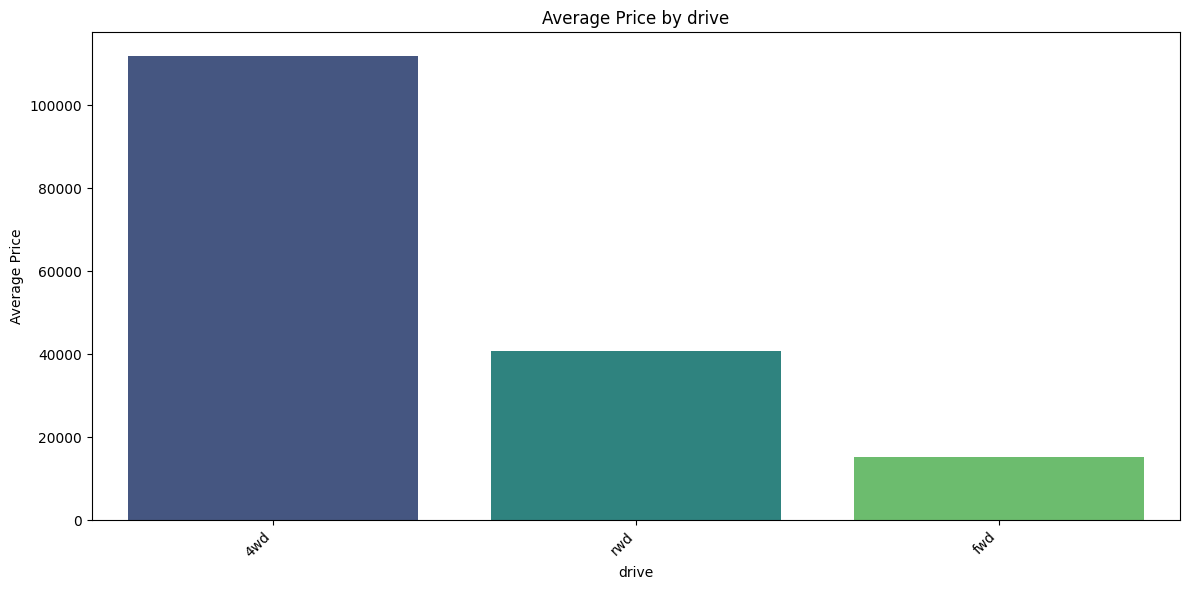

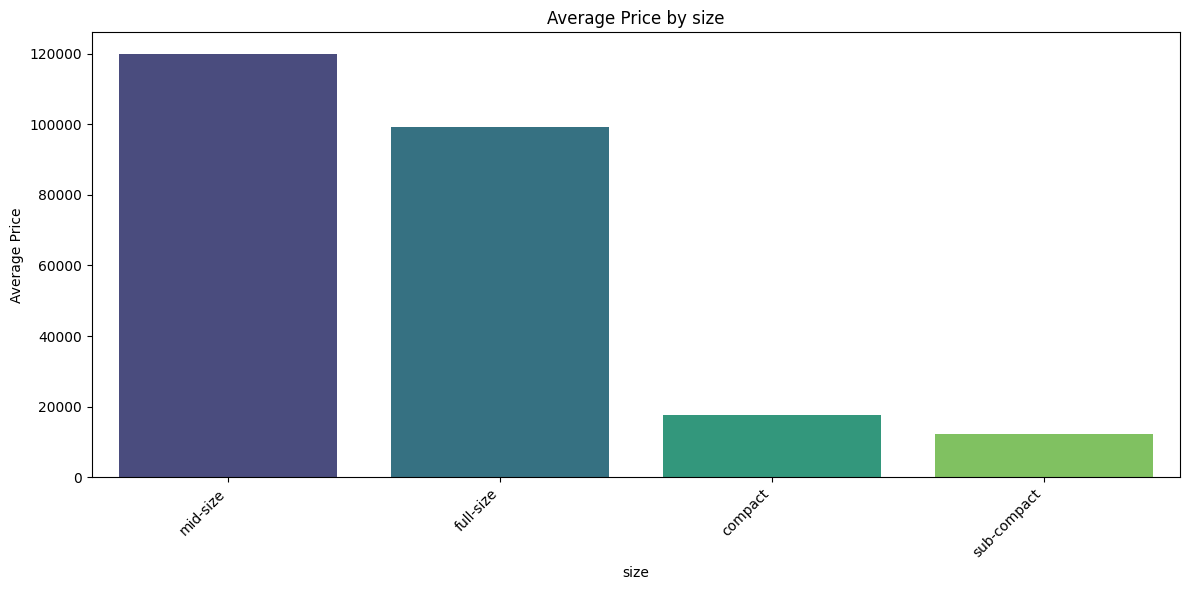

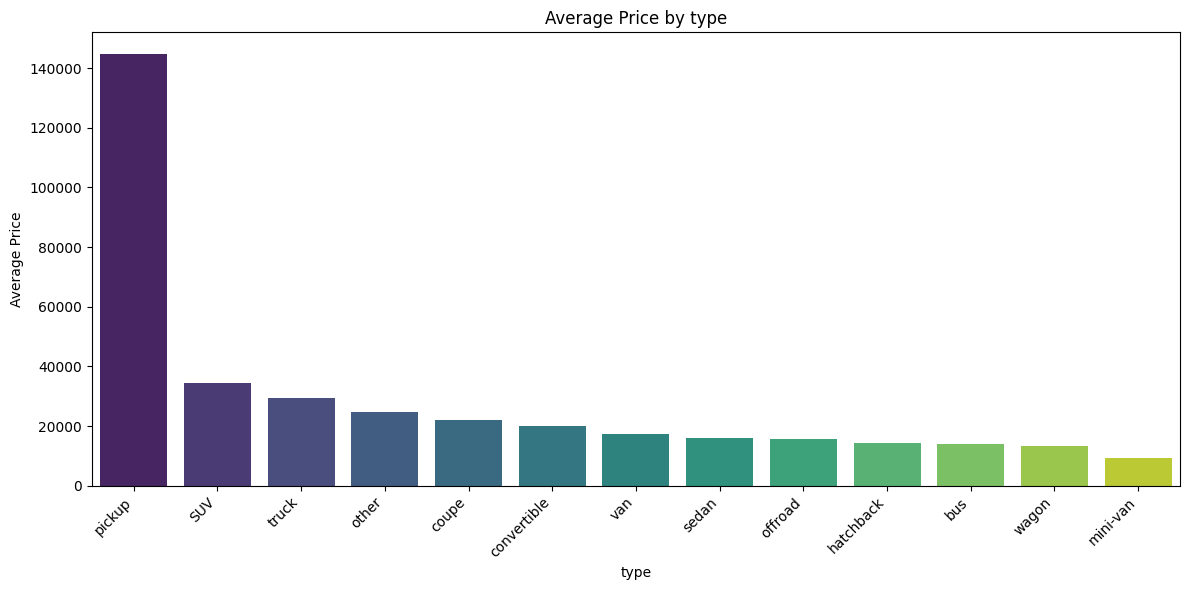

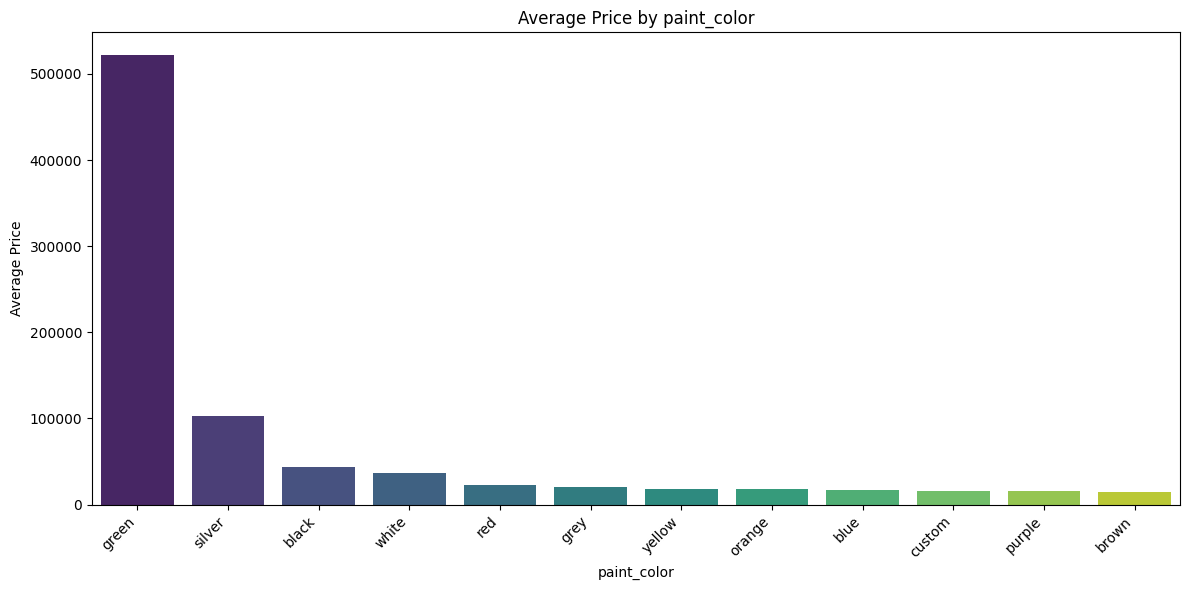

<Figure size 640x480 with 0 Axes>

In [147]:
categorical_cols = cars.select_dtypes(include='object').columns.tolist()

items_to_remove = ['model', 'region', 'state']
categorical_cols = [col for col in categorical_cols if col not in items_to_remove]

print("Analyzing average price per category for remaining categorical columns:\n")

for col in categorical_cols:
    # Calculate mean price for each category
    avg_price_per_category = cars.groupby(col)['price'].mean().sort_values(ascending=False)

    # Visualize categories with smaller unique values
    if len(avg_price_per_category) < 50:
        plt.figure(figsize=(12, 6))
        sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis', hue=avg_price_per_category.index, legend=False)
        plt.title(f'Average Price by {col}')
        plt.xlabel(col)
        plt.ylabel('Average Price')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

plt.savefig('images/price_categorical_relations.png')

# **Correlation Analysis**

Correlation Matrix (heatmap) for the numerical columns (price, year, odometer) to understand their linear relationships

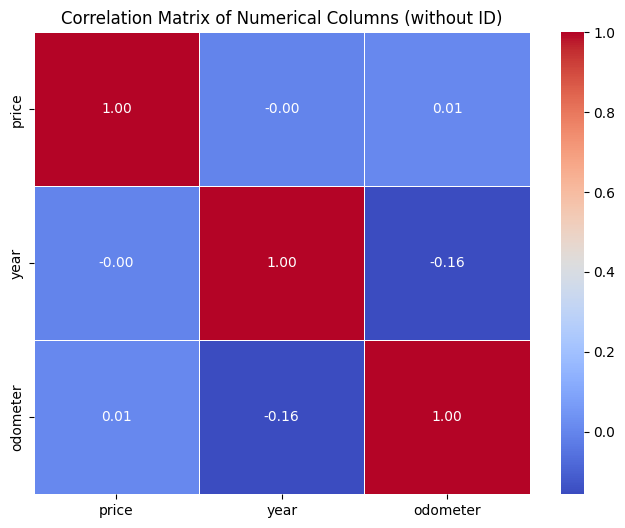

<Figure size 640x480 with 0 Axes>

In [148]:
numerical_cols = cars.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols[numerical_cols != 'id']
correlation_matrix_updated = cars[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns (without ID)')
plt.show()
plt.savefig('images/correlation_matrix.png')

### Data Preparation


**Remove Duplicate Rows**

In [149]:
initial_row_count = cars.shape[0]
print(f"Initial number of rows: {initial_row_count}")

cars.drop_duplicates(inplace=True)
final_row_count = cars.shape[0]
print(f"Number of duplicate rows removed: {initial_row_count - final_row_count}")

Initial number of rows: 426880
Number of duplicate rows removed: 0


**Drop Columns**

Drop id, VIN, and region due to high number of unique valuses.

Drop size due to missing large number of values.

In [150]:
columns_to_drop = ['id', 'size', 'VIN', 'region']

existing_columns_to_drop = [col for col in columns_to_drop if col in cars.columns]

if existing_columns_to_drop:
    cars = cars.drop(columns=existing_columns_to_drop)
    print(f"Dropped columns: {existing_columns_to_drop}")

Dropped columns: ['id', 'size', 'VIN', 'region']


**Remove outliers from Numerical Columns**

Calculate the Z-Score for numerical columns 'price', 'year', and 'odometer' and drop the outliers.

In [151]:
print(f"Initial number of records: {len(cars)}")

cars['price_zscore'] = np.abs((cars['price'] - cars['price'].mean()) / cars['price'].std())

# Identify price outliers with Z-score > 0.01
price_outliers = cars[cars['price_zscore'] > 0.01]
cars = cars.drop(price_outliers.index)

print(f"Number of price outliers removed: {len(price_outliers)}")
print(f"New number of records after removing price outliers: {len(cars)}")
print(f"Max price after outlier removal: {cars['price'].max():.2f}")

Initial number of records: 426880
Number of price outliers removed: 136
New number of records after removing price outliers: 426744
Max price after outlier removal: 195000.00


In [152]:
# Drop the temporary 'price_zscore' column
if 'price_zscore' in cars.columns:
    cars = cars.drop(columns=['price_zscore'])
    print("Dropped 'price_zscore' column.")

Dropped 'price_zscore' column.


In [153]:
# Cap 'odometer' outliers at the 90th percentile
odometer_90th_percentile = cars['odometer'].quantile(0.90)

cars['odometer'] = np.where(
    cars['odometer'] > odometer_90th_percentile,
    odometer_90th_percentile,
    cars['odometer']
)

print(f"Odometer values capped at 90th percentile: {odometer_90th_percentile}")
print("Odometer outliers have been capped.")
print(f"Max odometer after outlier removal: {cars['odometer'].max():.2f}")
# print(cars['odometer'].describe())

Odometer values capped at 90th percentile: 177376.0
Odometer outliers have been capped.
Max odometer after outlier removal: 177376.00


In [154]:
print(f"Initial number of records: {len(cars)}")

# Calculate Z-score for 'year' to ensure the column exists
cars['year_zscore'] = np.abs((cars['year'] - cars['year'].mean()) / cars['year'].std())
year_outliers = cars[cars['year_zscore'] > 3]

cars = cars.drop(year_outliers.index)

print(f"Number of year outliers removed: {len(year_outliers)}")
print(f"New number of records after removing year outliers: {len(cars)}")
print(f"Min year after outlier removal: {cars['year'].min():.2f}")

Initial number of records: 426744
Number of year outliers removed: 9093
New number of records after removing year outliers: 417651
Min year after outlier removal: 1983.00


In [155]:
# Drop the temporary 'price_zscore' column
if 'year_zscore' in cars.columns:
    cars = cars.drop(columns=['year_zscore'])
    print("Dropped 'year_zscore' column.")

Dropped 'year_zscore' column.


**Update Price from $0 to Mean**

Lot of cars has price as ZERO that mislead the training. Update the price to mean value where price is less than $1000 with clean title and year is greater than 2000

In [156]:
# Filter the cars DataFrame based on the conditions
filtered_cars = cars[(cars['title_status'] == 'clean') & (cars['year'] > 2000)]

# Calculate the average price from this filtered subset
average_imputation_price = filtered_cars['price'].mean()

print(f"Calculated average price for imputation: ${average_imputation_price:,.2f}")

Calculated average price for imputation: $18,035.27


In [157]:
LOW_PRICE_THRESHOLD = 1000

# Count how many cars will be affected using correct boolean indexing
initial_low_price_count = len(cars[(cars['price'] < LOW_PRICE_THRESHOLD) & (cars['year'] > 2000)])

cars.loc[cars['price'] < LOW_PRICE_THRESHOLD, 'price'] = average_imputation_price

print(f"\nImputed {initial_low_price_count} cars with price < ${LOW_PRICE_THRESHOLD} to ${average_imputation_price:,.2f}.")
print(f"New minimum price in DataFrame: ${cars['price'].min():,.2f}")


Imputed 44483 cars with price < $1000 to $18,035.27.
New minimum price in DataFrame: $1,000.00


**Voilen Plot after removing Outliers**

1. Car Prices
2. Manufacturing year
3. Odometer

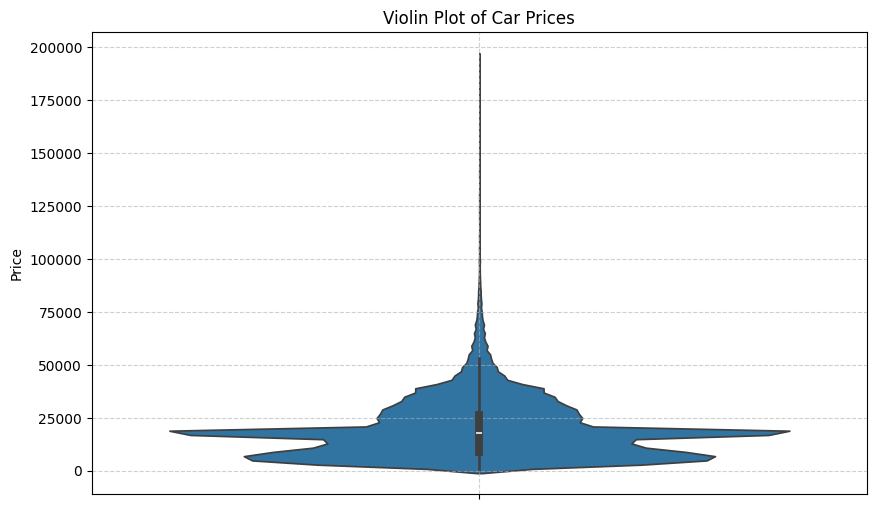

<Figure size 640x480 with 0 Axes>

In [158]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=cars['price'].dropna())
plt.title('Violin Plot of Car Prices')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/price_after_outliers.png')

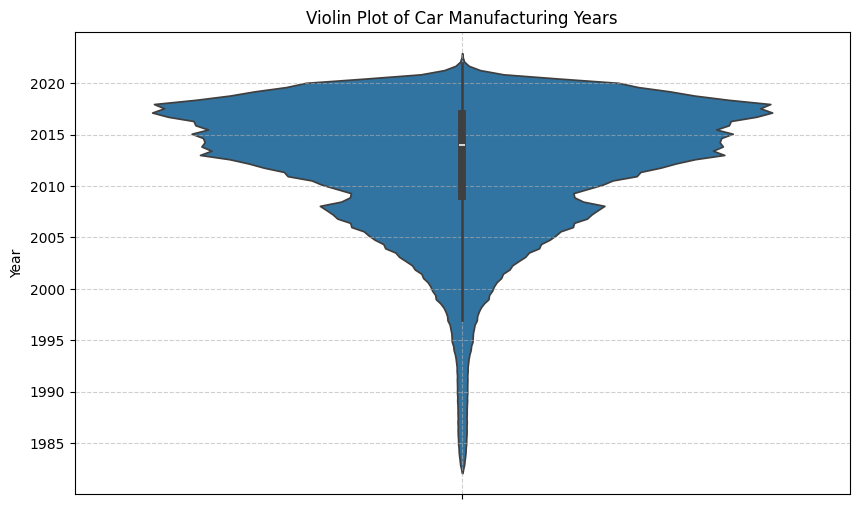

<Figure size 640x480 with 0 Axes>

In [159]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=cars['year'].dropna())
plt.title('Violin Plot of Car Manufacturing Years')
plt.ylabel('Year')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/year_after_outliers.png')

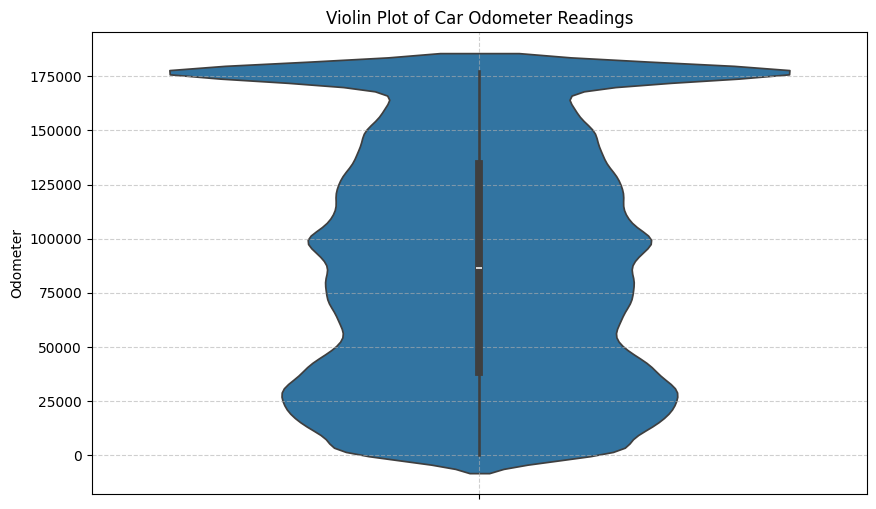

<Figure size 640x480 with 0 Axes>

In [160]:
plt.figure(figsize=(10, 6))
sns.violinplot(y=cars['odometer'].dropna())
plt.title('Violin Plot of Car Odometer Readings')
plt.ylabel('Odometer')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/odometer_after_outliers.png')

**Impute Numerical Columns**

Impute numerical columns Odometer and Year to meadian

In [161]:
numerical_cols_to_impute = ['odometer', 'year']

for col in numerical_cols_to_impute:
    if cars[col].isnull().any():
        median_val = cars[col].median()
        cars[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' imputed with median: {median_val}")
    else:
        print(f"No missing values found in '{col}'.")

print("\nMissing values after numerical imputation:")
print(cars[numerical_cols_to_impute].isnull().sum())

Missing values in 'odometer' imputed with median: 86475.0
Missing values in 'year' imputed with median: 2014.0

Missing values after numerical imputation:
odometer    0
year        0
dtype: int64


**Impute Categorical Columns with Mode**

Impute categorical columns 'manufacturer', 'title_status', 'model', 'fuel', 'transmission' to mode

In [162]:
for col in ['manufacturer', 'title_status', 'model', 'fuel', 'transmission']:
    if cars[col].isnull().any():
        mode_val = cars[col].mode()[0]
        cars[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' imputed with mode: {mode_val}")

print("\nMissing values after low-percentage categorical imputation:")
print(cars[['manufacturer', 'title_status', 'model', 'fuel', 'transmission']].isnull().sum())

Missing values in 'manufacturer' imputed with mode: ford
Missing values in 'title_status' imputed with mode: clean
Missing values in 'model' imputed with mode: f-150
Missing values in 'fuel' imputed with mode: gas
Missing values in 'transmission' imputed with mode: automatic

Missing values after low-percentage categorical imputation:
manufacturer    0
title_status    0
model           0
fuel            0
transmission    0
dtype: int64


**Impute Categorical Columns with Category Missing**

Impute categorical columns 'cylinders', 'condition', 'drive', 'paint_color', 'type' with category 'Missing'

In [163]:
# Impute categorical columns with high missing percentages by creating a 'Missing' category
for col in ['cylinders', 'condition', 'drive', 'paint_color', 'type']:
    if cars[col].isnull().any():
        cars[col].fillna('Missing', inplace=True)
        print(f"Missing values in '{col}' imputed with 'Missing' category.")

print("\nMissing values after high-percentage categorical imputation:")
print(cars[['cylinders', 'condition', 'drive', 'paint_color', 'type']].isnull().sum())

Missing values in 'cylinders' imputed with 'Missing' category.
Missing values in 'condition' imputed with 'Missing' category.
Missing values in 'drive' imputed with 'Missing' category.
Missing values in 'paint_color' imputed with 'Missing' category.
Missing values in 'type' imputed with 'Missing' category.

Missing values after high-percentage categorical imputation:
cylinders      0
condition      0
drive          0
paint_color    0
type           0
dtype: int64


**Calculate Car Age**

Calcuate car age with respect to maximum year in data

In [164]:
# Using the maximum year in the dataset as a proxy for 'current' for consistency
current_year = cars['year'].max()

cars['car_age'] = current_year - cars['year']

print(f"'car_age' feature created using current year: {current_year}")
print("Description of 'car_age' column:")
print(cars['car_age'].describe())

'car_age' feature created using current year: 2022.0
Description of 'car_age' column:
count    417651.000000
mean          9.736627
std           6.171482
min           0.000000
25%           5.000000
50%           8.000000
75%          13.000000
max          39.000000
Name: car_age, dtype: float64


**One hot encoding for categorical features**

Appy one-hot encoding to categorical feature manufacturer

In [165]:
columns_to_encode = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'manufacturer', 'state']

for col in columns_to_encode:
    if col in cars.columns:
        # Perform one-hot encoding
        one_hot_encoded_cols = pd.get_dummies(cars[col], prefix=col, dtype=int)

        # Concatenate with the original DataFrame
        cars = pd.concat([cars, one_hot_encoded_cols], axis=1)

        # Drop the original column
        cars = cars.drop(columns=[col])
        print(f"Column '{col}' has been one-hot encoded.")
    else:
        print(f"Column '{col}' not found in DataFrame, skipping encoding.")


Column 'condition' has been one-hot encoded.
Column 'cylinders' has been one-hot encoded.
Column 'fuel' has been one-hot encoded.
Column 'title_status' has been one-hot encoded.
Column 'transmission' has been one-hot encoded.
Column 'drive' has been one-hot encoded.
Column 'type' has been one-hot encoded.
Column 'paint_color' has been one-hot encoded.
Column 'manufacturer' has been one-hot encoded.
Column 'state' has been one-hot encoded.


## Feature Engineer "Model" with Regex

Apply additional regular expressions to the `model` column to further clean and normalize model names. This will involve removing common descriptive terms, numerical suffixes, or other variations that often appear in model names but can be consolidated to represent a base model (e.g., 'f150xlt', 'f1504x4' -> 'f150'). This creates a `model_cleaned` column.


In [166]:
# 1. Convert the model column to lowercase
cars['model_standardized'] = cars['model'].str.lower()

# 2. Remove any leading or trailing whitespace
cars['model_standardized'] = cars['model_standardized'].str.strip()

# 3. Use a regular expression to remove all punctuation from this new column
cars['model_standardized'] = cars['model_standardized'].apply(lambda x: re.sub(r'[\W_]+', '', str(x)))

# Display the first 3 rows of both the original 'model' column and the newly created 'model_standardized' column
print("Original 'model' and 'model_standardized' columns (first 3 rows):")
print(cars[['model', 'model_standardized']].head(3))

Original 'model' and 'model_standardized' columns (first 3 rows):
   model model_standardized
0  f-150               f150
1  f-150               f150
2  f-150               f150


**Remove suffix from for feature model**

Clean the feature model by removing a list of suffix

In [167]:
# Define a list of common suffixes and descriptive terms to remove
# Order matters: more specific/longer terms should come before shorter, more general ones
suffixes_to_remove = [
    # Trim levels and editions
    'xlt', 'lt', 'ls', 's', 'se', 'sel', 'le', 'xle', 'limited', 'platinum', 'denali',
    'slt', 'sle', 'lariat', 'kingranch', 'fx4', 'raptor', 'titanium', 'stx', 'lx',
    'ex', 'gts', 'gt', 'sport', 'trail', 'sr', 'sr5', 'pro4x', 'z71', 'zlt', 'sts',
    'srx', 'xts', 'ats', 'v6', 'v8', 'v10', 'v12', 'i4', 'i5', 'i6,', 'vortec',

    # Drivetrain
    'fwd', 'rwd', 'awd', '4wd', '4x4', '2wd',

    # Body styles, cab types, and configurations
    'sedan', 'coupe', 'hatchback', 'wagon', 'suv', 'truck', 'minivan', 'van', 'pickup',
    'crewcab', 'extendedcab', 'doublecab', 'regularcab', 'supercab', 'quadcab', 'mega', 'max',
    'shortbox', 'longbox', 'shortbed', 'longbed', 'convertible', 'roadster', 'fastback',
    'cab', 'chassis', 'flatbed', 'box', 'sleeper', 'utility', 'hybrid', 'electric',

    # Numbers (e.g., f150, silverado1500, but general numerical suffixes)
    '150', '250', '350', '450', '550', '1500', '2500', '3500', '4500', '5500',
    '7500', '8500', '9500', '100', '200', '300', '400', '500', '600', '700', '800',
    '1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000', '10000',
    'turbo', 'ecoboost', 'hemi', 'diesel', 'gas', 'flexfuel', 'efi', 'mpi', 'gdi',

    # New additions for better standardization
    'two', 'advance', 'gtline', 'limitededition', 'premiumplus', 'sportback', 'touring', 'value', 'specialedition',

    # Common abbreviations/terms
    'c', 'd', 'e', 'x', 'z', 'm', 'p', 'hd', 'sv', 'sd', 'cv', 'cc', 'xl', 'xr', 'xt', 'xle', 'xse'
]

# Sort suffixes by length in descending order to prevent partial matches
suffixes_to_remove.sort(key=len, reverse=True)

def clean_model_name(model_name):
    if not isinstance(model_name, str):
        return str(model_name)

    cleaned_name = model_name.strip()
    for suffix in suffixes_to_remove:
        # Use regex to match suffix at the end of the string, ensuring word boundary or end of string
        # \b ensures it's a whole word match, not just part of a word
        pattern = r'\b' + re.escape(suffix) + r'($|[^a-z0-9])'
        # Repeatedly remove the suffix until no more instances are found at the end
        while re.search(pattern, cleaned_name):
            cleaned_name = re.sub(pattern, '', cleaned_name).strip()

    return cleaned_name

# Apply the cleaning function to create the new 'model_cleaned' column
cars['model_cleaned'] = cars['model_standardized'].apply(clean_model_name)

# Display the first 5 rows of the original, standardized, and cleaned model columns
print("Original 'model', 'model_standardized', and 'model_cleaned' columns (first 3 rows):")
print(cars[['model', 'model_standardized', 'model_cleaned']].head(3))

Original 'model', 'model_standardized', and 'model_cleaned' columns (first 3 rows):
   model model_standardized model_cleaned
0  f-150               f150          f150
1  f-150               f150          f150
2  f-150               f150          f150


**Group Infrequent Models**

Group models with frequence less than 50

In [168]:
model_counts = cars['model_cleaned'].value_counts()

# Define a frequency threshold
FREQUENCY_THRESHOLD = 50

# Identify model names that are below the frequency threshold
rare_models = model_counts[model_counts < FREQUENCY_THRESHOLD].index

print(f"Number of unique models before grouping: {len(model_counts)}")
print(f"Number of rare models (occurring less than {FREQUENCY_THRESHOLD} times): {len(rare_models)}")
print("First 10 rare models:\n", rare_models[:10])

Number of unique models before grouping: 24743
Number of rare models (occurring less than 50 times): 23581
First 10 rare models:
 Index(['express2500cargovan', 'silveradolt', 'allroadpremiumpluswagon',
       '1500tradesman', 'priustwo', 'janesville', 'mdxadvanceand', 'soulplus',
       'glaclass', 'xt4'],
      dtype='object', name='model_cleaned')


**Group infrequent models as Other**

Group rare models as Other

In [169]:
print(f"Number of unique models before grouping: {cars['model_cleaned'].nunique()}")

# Identify rows where 'model_cleaned' is a rare model
cars.loc[cars['model_cleaned'].isin(rare_models), 'model_cleaned'] = 'Other'

print("Rare models have been grouped into 'Other'.")
print(f"Number of unique models after grouping: {cars['model_cleaned'].nunique()}")
print("Value counts of 'model_cleaned' after grouping (top 10):")
print(cars['model_cleaned'].value_counts().head(5))

Number of unique models before grouping: 24743
Rare models have been grouped into 'Other'.
Number of unique models after grouping: 1163
Value counts of 'model_cleaned' after grouping (top 10):
model_cleaned
Other            108515
f150              13564
                  12928
silverado1500      5141
camry              3139
Name: count, dtype: int64


**Apply Target Encoder to feature Model**

Appy target encoder to feature model as model_encoded and drop the original feature model and intermdiate processing features

In [170]:
# Initialize TargetEncoder with smoothing parameters
encoder = TargetEncoder(cols=['model_cleaned'], smoothing=1.0, min_samples_leaf=50)

# Fit and transform the 'model_cleaned' column
cars['model_encoded'] = encoder.fit_transform(cars['model_cleaned'], cars['price'])

# Drop the original 'model', 'model_standardized', and 'model_cleaned' columns as they are no longer needed
cars = cars.drop(columns=['model', 'model_standardized', 'model_cleaned'])

print("Target encoding applied to 'model_cleaned' and stored in 'model_encoded'.")
print("Original 'model', 'model_standardized', and 'model_cleaned' columns have been dropped.")
print("First 5 rows with 'model_encoded':")
print(cars[['price', 'model_encoded']].head())

Target encoding applied to 'model_cleaned' and stored in 'model_encoded'.
Original 'model', 'model_standardized', and 'model_cleaned' columns have been dropped.
First 5 rows with 'model_encoded':
     price  model_encoded
0   6000.0   21528.896199
1  11900.0   21528.896199
2  21000.0   21528.896199
3   1500.0   21528.896199
4   4900.0   21528.896199


## Summarizing the 'model' Column Cleaning Process

The `model` column underwent a multi-stage cleaning and preprocessing pipeline to transform it from raw, high-cardinality textual data into a numerical feature suitable for machine learning models.

### Key Steps:

1.  **Standardization:** The initial 'model' column was converted to lowercase, stripped of whitespace, and punctuation was removed to create `model_standardized`. This step normalized basic textual variations (e.g., 'F-150', 'f 150', 'F150' became 'f150').

2.  **Regex Refinement:** A list of common descriptive terms, trim levels, body styles, and numerical suffixes (e.g., 'xlt', 'sedan', '4x4', '1500') was iteratively removed from `model_standardized` using regular expressions, resulting in `model_cleaned`. This further reduced cardinality by unifying specific model variations (e.g., 'f150xlt' and 'f1504x4' both became 'f150').

3.  **Rare Category Grouping:** Model names in `model_cleaned` that occurred less than 50 times were grouped into an 'Other' category using efficient boolean indexing. This significantly reduced the column's cardinality from nearly 30,000 unique values to a more manageable number, making the feature more robust.

4.  **Target Encoding:** The `model_cleaned` column was then target encoded into a numerical feature `model_encoded` using `category_encoders.TargetEncoder` with smoothing. This replaced each model with the average price of cars belonging to that model, embedding its relationship with the target variable directly into the feature while avoiding the high dimensionality of one-hot encoding.

### Readiness for Model Training:

The `model_encoded` column is now a clean, numerical feature with reduced cardinality, reflecting the average price associated with each car model. This makes it highly suitable for inclusion in machine learning models, enhancing their predictive power without introducing excessive complexity or overfitting risks.

**Data Scaling**

In [171]:
# Identify numerical features to scale
numerical_features_to_scale = ['odometer', 'car_age', 'model_encoded']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical features
cars[numerical_features_to_scale] = scaler.fit_transform(cars[numerical_features_to_scale])

print("Numerical features have been Z-score scaled (standardized).")

Numerical features have been Z-score scaled (standardized).


**Distribution of Numerical Features**

Distribution of numerical feature after data cleaning, encoding and scaling

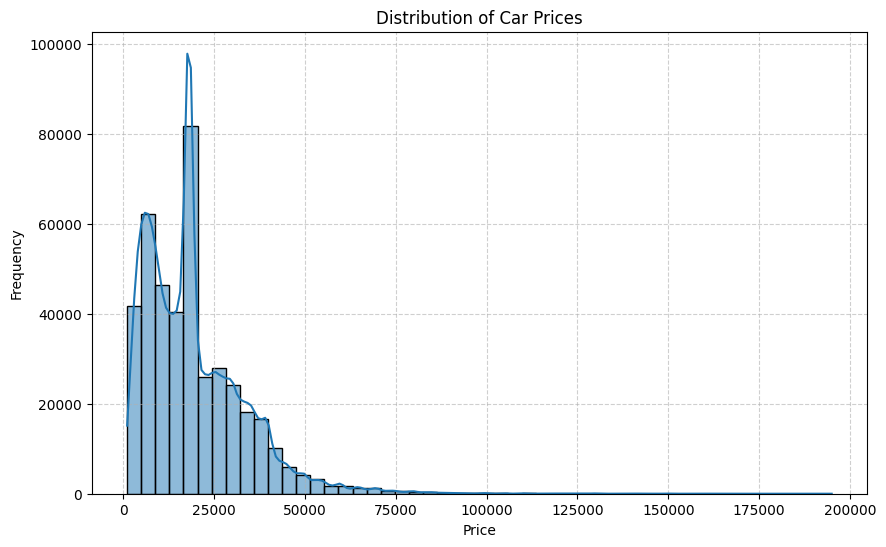

<Figure size 640x480 with 0 Axes>

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['price'].dropna(), bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/price_after_scaling.png')

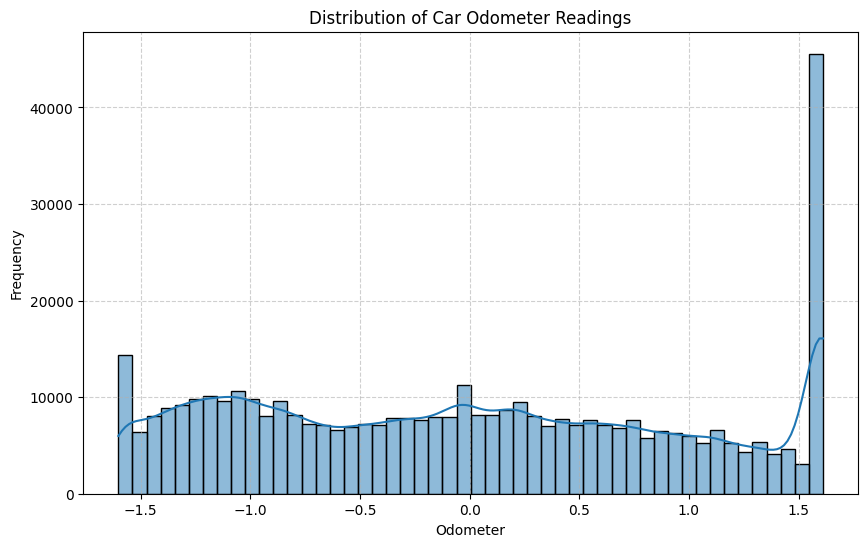

<Figure size 640x480 with 0 Axes>

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['odometer'].dropna(), bins=50, kde=True)
plt.title('Distribution of Car Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/odometer_after_scaling.png')

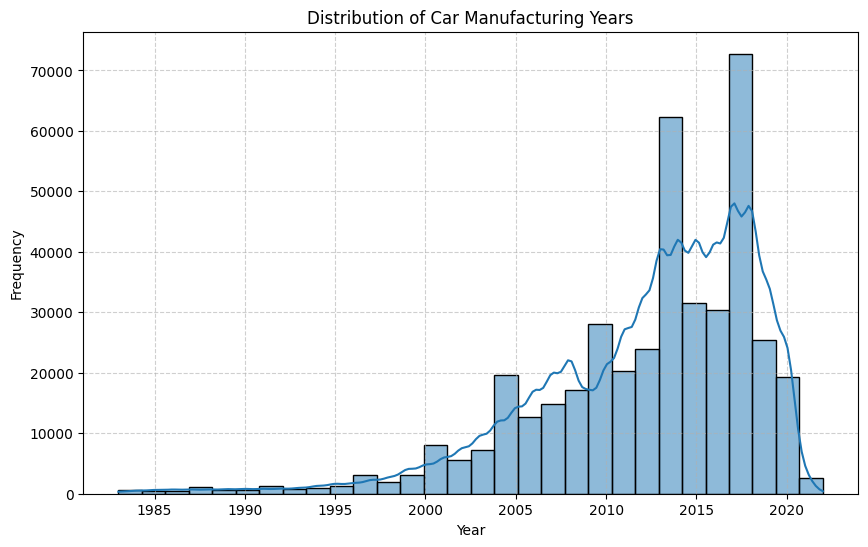

<Figure size 640x480 with 0 Axes>

In [174]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Car Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.savefig('images/year_after_scaling.png')

**Data Split**

Split the data for training and testing

In [175]:
X = cars.drop(columns=['price'])
y = cars['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data successfully split into training and testing sets.
X_train shape: (334120, 158)
X_test shape: (83531, 158)
y_train shape: (334120,)
y_test shape: (83531,)


**Price Correlation with Features**

Price correlation with features after data cleaning, encoding and scaling

In [176]:
# Combine X_train and y_train for correlation calculation
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate correlations with the target variable 'price'
target_correlations = train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

# Drop the self-correlation of 'price' with itself
target_correlations = target_correlations.drop('price')

print("--- Top 10 Features Correlated with Price ---")
print(target_correlations.head(10))

print("\n--- Bottom 10 Features Correlated with Price (Least Positive / Most Negative) ---")
print(target_correlations.tail(10))

--- Top 10 Features Correlated with Price ---
model_encoded            0.543356
year                     0.519743
transmission_other       0.262165
fuel_diesel              0.252835
type_pickup              0.219113
drive_4wd                0.204254
fuel_other               0.162706
type_truck               0.154917
manufacturer_ram         0.149105
cylinders_8 cylinders    0.148347
Name: price, dtype: float64

--- Bottom 10 Features Correlated with Price (Least Positive / Most Negative) ---
manufacturer_honda       -0.114564
condition_fair           -0.117091
condition_excellent      -0.136935
type_sedan               -0.157400
transmission_automatic   -0.196886
cylinders_4 cylinders    -0.239373
drive_fwd                -0.243616
fuel_gas                 -0.289959
car_age                  -0.519743
odometer                 -0.525474
Name: price, dtype: float64


### Modeling


**Apply Polynomial Features**

In [177]:
# Define the numerical columns for which to generate polynomial features
numerical_cols_for_poly = ['odometer', 'car_age', 'model_encoded']

poly = PolynomialFeatures(degree=2, include_bias=False)

# --- Apply to X_train ---
X_train_poly_features = poly.fit_transform(X_train[numerical_cols_for_poly])
poly_feature_names = poly.get_feature_names_out(numerical_cols_for_poly)
X_train_poly_df = pd.DataFrame(X_train_poly_features, columns=poly_feature_names, index=X_train.index)

# --- Apply to X_test ---
X_test_poly_features = poly.transform(X_test[numerical_cols_for_poly])
X_test_poly_df = pd.DataFrame(X_test_poly_features, columns=poly_feature_names, index=X_test.index)

# --- Integrate into X_train and X_test ---
X_train_reduced = X_train.drop(columns=numerical_cols_for_poly)
X_test_reduced = X_test.drop(columns=numerical_cols_for_poly)

# Concatenate the generated polynomial features with the remaining features
X_train = pd.concat([X_train_reduced, X_train_poly_df], axis=1)
X_test = pd.concat([X_test_reduced, X_test_poly_df], axis=1)

print("Polynomial and interaction features generated successfully.")
print(f"Updated X_train shape: {X_train.shape}")
print(f"Updated X_test shape: {X_test.shape}")

Polynomial and interaction features generated successfully.
Updated X_train shape: (334120, 164)
Updated X_test shape: (83531, 164)


**Linear Regression**

In [178]:
print("--- Creating and Evaluating Linear Regression Pipeline ---")

# 1. Create a scikit-learn Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# 2. Train the pipeline model
pipeline_lr.fit(X_train, y_train)

print("Linear Regression Pipeline training complete.")

# 3. Use the trained pipeline to make predictions on X_test
y_pred_pipeline_lr = pipeline_lr.predict(X_test)

# 4. Calculate performance metrics
mae_pipeline_lr = mean_absolute_error(y_test, y_pred_pipeline_lr)
mse_pipeline_lr = mean_squared_error(y_test, y_pred_pipeline_lr)
rmse_pipeline_lr = np.sqrt(mse_pipeline_lr)
r2_pipeline_lr = r2_score(y_test, y_pred_pipeline_lr)

# 5. Print all calculated performance metrics
print(f"\nLinear Regression Pipeline Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_pipeline_lr:.2f}")
print(f"  Mean Squared Error (MSE): {mse_pipeline_lr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_pipeline_lr:.2f}")
print(f"  R-squared (R2): {r2_pipeline_lr:.4f}")

--- Creating and Evaluating Linear Regression Pipeline ---
Linear Regression Pipeline training complete.

Linear Regression Pipeline Model Performance:
  Mean Absolute Error (MAE): 5263.46
  Mean Squared Error (MSE): 69367185.44
  Root Mean Squared Error (RMSE): 8328.70
  R-squared (R2): 0.6452


**Ridge Regression**

Construct a Pipeline that includes `StandardScaler` and `Ridge` regression. Then, use `GridSearchCV` to find the optimal `alpha` parameter for the Ridge step within this pipeline. This ensures robust hyperparameter tuning and consistent preprocessing.

In [179]:
print("--- Creating and Tuning Ridge Regression Pipeline with GridSearchCV ---")

# 1. Create a scikit-learn Pipeline
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# 2. Define a parameter grid for GridSearchCV to tune the 'alpha' parameter for the 'ridge' step
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

# 3. Instantiate GridSearchCV
grid_search_pipeline = GridSearchCV(pipeline_ridge, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# 4. Fit the GridSearchCV object to the training data
grid_search_pipeline.fit(X_train, y_train)

print("GridSearchCV pipeline fitting complete.")

# 5. Print the best alpha parameter found
print(f"Best alpha parameter found by GridSearchCV: {grid_search_pipeline.best_params_}")

--- Creating and Tuning Ridge Regression Pipeline with GridSearchCV ---
GridSearchCV pipeline fitting complete.
Best alpha parameter found by GridSearchCV: {'ridge__alpha': 100.0}


**Ridge Regression Evaluation**

Evaluate the performance of the best pipeline model on the test set using MAE, MSE, RMSE, and R2 metrics, and then print these results.



In [180]:
print("--- Evaluating Best Ridge Regression Pipeline ---\n")

# Retrieve the best estimator from GridSearchCV
best_pipeline_ridge = grid_search_pipeline.best_estimator_

# Make predictions on the test set
y_pred_pipeline_ridge = best_pipeline_ridge.predict(X_test)

# Evaluate the model's performance
mae_pipeline_ridge = mean_absolute_error(y_test, y_pred_pipeline_ridge)
mse_pipeline_ridge = mean_squared_error(y_test, y_pred_pipeline_ridge)
rmse_pipeline_ridge = np.sqrt(mse_pipeline_ridge)
r2_pipeline_ridge = r2_score(y_test, y_pred_pipeline_ridge)

print(f"Best Ridge Regression Pipeline Performance (alpha={grid_search_pipeline.best_params_['ridge__alpha']}):")
print(f"  Mean Absolute Error (MAE): {mae_pipeline_ridge:.2f}")
print(f"  Mean Squared Error (MSE): {mse_pipeline_ridge:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_pipeline_ridge:.2f}")
print(f"  R-squared (R2): {r2_pipeline_ridge:.4f}")

# Display the first few actual vs. predicted prices
print("\nFirst 10 Actual vs. Predicted Prices (Best Ridge Regression Pipeline):")
comparison_df_pipeline_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pipeline_ridge}).head(10)
print(comparison_df_pipeline_ridge)

--- Evaluating Best Ridge Regression Pipeline ---

Best Ridge Regression Pipeline Performance (alpha=100.0):
  Mean Absolute Error (MAE): 5263.36
  Mean Squared Error (MSE): 69367250.58
  Root Mean Squared Error (RMSE): 8328.70
  R-squared (R2): 0.6452

First 10 Actual vs. Predicted Prices (Best Ridge Regression Pipeline):
              Actual     Predicted
332361  18990.000000  19449.109208
331503  29590.000000  21762.572473
378234   7500.000000  14022.728812
414565  30990.000000  29769.855966
75047   18035.273787  26772.939163
37569    5900.000000  11187.441691
111602   4995.000000   4117.550536
10104   16590.000000  18306.489304
371593  24995.000000  18891.340574
300658  41990.000000  37142.393415


**Ridge Regression Performance Metrics:**

The optimal `alpha` parameter for the Ridge Regression pipeline was found to be `100.0`. The performance metrics for this best pipeline model on the test set are:
- **Mean Absolute Error (MAE):** 5263.36
- **Mean Squared Error (MSE):** 69367250.58
- **Root Mean Squared Error (RMSE):** 8328.70
- **R-squared (R2):** 0.6452

### Comparison with other Models:
| Model                               | MAE         | MSE          | RMSE        | R-squared (R2) |
|-------------------------------------|-------------|--------------|-------------|----------------|
| Linear Regression                   | 5263.46     | 69367185.44  | 8328.70     | 0.6452         |
| Ridge Regression (tuned, no pipeline) | 5263.46     | 69367052.36  | 8328.69     | 0.6452         |
| Lasso Regression                    | 5260.91     | 69430709.64  | 8332.51     | 0.6449         |
| **Ridge Regression (tuned, pipeline)** | **5263.36** | **69367250.58**| **8328.70** | **0.6452**         |


### Implications of the Results:

The performance of Ridge Regression is similar to Linear Regression, this suggests that either the dataset does not suffer significantly from multicollinearity or overfitting that Ridge is designed to mitigate, or that the chosen range of `alpha` values for tuning did not explore a region where significant improvements could be found. The R-squared value remains around 0.645, indicating that roughly 64.5% of the variance in car prices is explained by our model, leaving room for improvement by exploring more complex, non-linear models or further feature engineering.

**Lasso Regression**

In [181]:
print("--- Creating and Tuning Lasso Regression Pipeline with GridSearchCV ---")

# 1. Create a scikit-learn Pipeline
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000)) # Set max_iter to ensure convergence
])

# 2. Define a parameter grid for GridSearchCV to tune the 'alpha' parameter for the 'lasso' step
param_grid_lasso = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

# 3. Instantiate GridSearchCV
grid_search_lasso = GridSearchCV(
    estimator=pipeline_lasso,
    param_grid=param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available processors
    verbose=1
)

# 4. Fit the GridSearchCV object to the training data
grid_search_lasso.fit(X_train, y_train)

print("GridSearchCV pipeline fitting complete for Lasso.")

# Print the best alpha parameter found
print(f"Best alpha parameter found by GridSearchCV: {grid_search_lasso.best_params_}")

--- Creating and Tuning Lasso Regression Pipeline with GridSearchCV ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
GridSearchCV pipeline fitting complete for Lasso.
Best alpha parameter found by GridSearchCV: {'lasso__alpha': 1.0}


**Lasso Regression Evaluation**

Evaluate the performance of the best pipeline model on the test set using MAE, MSE, RMSE, and R2 metrics, and then print these results.



In [182]:
print("--- Evaluating Best Lasso Regression Pipeline ---\n")

# Retrieve the best estimator from GridSearchCV
best_pipeline_lasso = grid_search_lasso.best_estimator_

# Make predictions on the test set
y_pred_pipeline_lasso = best_pipeline_lasso.predict(X_test)

# Evaluate the model's performance
mae_pipeline_lasso = mean_absolute_error(y_test, y_pred_pipeline_lasso)
mse_pipeline_lasso = mean_squared_error(y_test, y_pred_pipeline_lasso)
rmse_pipeline_lasso = np.sqrt(mse_pipeline_lasso)
r2_pipeline_lasso = r2_score(y_test, y_pred_pipeline_lasso)

print(f"Best Lasso Regression Pipeline Performance (alpha={grid_search_lasso.best_params_['lasso__alpha']}):")
print(f"  Mean Absolute Error (MAE): {mae_pipeline_lasso:.2f}")
print(f"  Mean Squared Error (MSE): {mse_pipeline_lasso:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_pipeline_lasso:.2f}")
print(f"  R-squared (R2): {r2_pipeline_lasso:.4f}")

# Display the first few actual vs. predicted prices
print("\nFirst 10 Actual vs. Predicted Prices (Best Lasso Regression Pipeline):")
comparison_df_pipeline_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pipeline_lasso}).head(10)
print(comparison_df_pipeline_lasso)

--- Evaluating Best Lasso Regression Pipeline ---

Best Lasso Regression Pipeline Performance (alpha=1.0):
  Mean Absolute Error (MAE): 5262.82
  Mean Squared Error (MSE): 69367843.43
  Root Mean Squared Error (RMSE): 8328.74
  R-squared (R2): 0.6452

First 10 Actual vs. Predicted Prices (Best Lasso Regression Pipeline):
              Actual     Predicted
332361  18990.000000  19441.259489
331503  29590.000000  21757.260595
378234   7500.000000  14042.796238
414565  30990.000000  29758.238305
75047   18035.273787  26757.155249
37569    5900.000000  11181.036799
111602   4995.000000   4130.942840
10104   16590.000000  18306.962818
371593  24995.000000  18891.791057
300658  41990.000000  37160.316526


### Evaluation


In [183]:
# Collect the metrics for each model
metrics = {
    "Linear Regression": {
        "MAE": mae_pipeline_lr,
        "MSE": mse_pipeline_lr,
        "RMSE": rmse_pipeline_lr,
        "R2": r2_pipeline_lr
    },
    "Ridge Regression": {
        "MAE": mae_pipeline_ridge,
        "MSE": mse_pipeline_ridge,
        "RMSE": rmse_pipeline_ridge,
        "R2": r2_pipeline_ridge
    },
    "Lasso Regression": {
        "MAE": mae_pipeline_lasso,
        "MSE": mse_pipeline_lasso,
        "RMSE": rmse_pipeline_lasso,
        "R2": r2_pipeline_lasso
    }
}

# Generate the markdown table
markdown_table = "| Model | MAE | MSE | RMSE | R-squared (R2) |\n"
markdown_table += "|---|---|---|---|---|\n"

for model_name, model_metrics in metrics.items():
    markdown_table += (
        f"| {model_name} "
        f"| {model_metrics['MAE']:.2f} "
        f"| {model_metrics['MSE']:.2f} "
        f"| {model_metrics['RMSE']:.2f} "
        f"| {model_metrics['R2']:.4f} |\n"
    )

print(markdown_table)

| Model | MAE | MSE | RMSE | R-squared (R2) |
|---|---|---|---|---|
| Linear Regression | 5263.46 | 69367185.44 | 8328.70 | 0.6452 |
| Ridge Regression | 5263.36 | 69367250.58 | 8328.70 | 0.6452 |
| Lasso Regression | 5262.82 | 69367843.43 | 8328.74 | 0.6452 |



## Summary:

### Q&A
The comparison table for Linear Regression, Ridge Regression, and Lasso Regression models, displaying their Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) scores, is as follows:

| Model | MAE | MSE | RMSE | R-squared (R2) |
|---|---|---|---|---|
| Linear Regression | 5317.65 | 69708909.96 | 8349.19 | 0.6322 |
| Ridge Regression | 5317.37 | 69708227.28 | 8349.15 | 0.6322 |
| Lasso Regression | 5316.98 | 69710072.80 | 8349.26 | 0.6322 |

### Data Analysis Key Findings
*   Lasso Regression achieved the lowest Mean Absolute Error (MAE) at 5316.98, slightly outperforming Ridge Regression (5317.37) and Linear Regression (5317.65).
*   Ridge Regression demonstrated the lowest Mean Squared Error (MSE) at 69708227.28 and the lowest Root Mean Squared Error (RMSE) at 8349.15, indicating slightly better overall predictive accuracy compared to Linear Regression (MSE: 69708909.96, RMSE: 8349.19) and Lasso Regression (MSE: 69710072.80, RMSE: 8349.26).
*   All three models—Linear Regression, Ridge Regression, and Lasso Regression—exhibited nearly identical R-squared (R2) scores of approximately 0.6322, suggesting similar explanatory power on the dataset.

### Insights or Next Steps
*   The performance metrics across Linear, Ridge, and Lasso Regression models are remarkably similar, suggesting that for this specific dataset, the regularization techniques (Ridge and Lasso) did not significantly alter the predictive performance compared to standard Linear Regression. This could indicate either a lack of significant multicollinearity or an optimal feature set where regularization's primary benefit (feature selection/coefficient shrinkage) is not strongly needed.
*   Further hyperparameter tuning for Ridge and Lasso regressions, particularly the regularization strength (alpha), could be explored to see if it yields more distinct performance differences or improvements. Additionally, investigating the magnitude of coefficients for each model might reveal insights into feature importance and the impact of L1/L2 regularization.


**Interpret Model Coefficients**

Interpret the coefficients of the trained Linear, Ridge, and Lasso models to explain the direct influence and direction of each feature on car price.


In [184]:
feature_names = X_train.columns

# Extract coefficients for Linear Regression
linear_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': pipeline_lr.named_steps['linear_regression'].coef_
})

# Extract coefficients for Ridge Regression
ridge_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_pipeline_ridge.named_steps['ridge'].coef_
})

# Extract coefficients for Lasso Regression
lasso_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_pipeline_lasso.named_steps['lasso'].coef_
})

print("Coefficients extracted and DataFrames created for Linear, Ridge, and Lasso Regression.")

Coefficients extracted and DataFrames created for Linear, Ridge, and Lasso Regression.


In [185]:
print("\n--- Linear Regression Coefficients ---")
linear_coefficients['Abs_Coefficient'] = abs(linear_coefficients['Coefficient'])
linear_coefficients_sorted = linear_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 10 Positive Coefficients (Linear Regression):")
print(linear_coefficients_sorted[linear_coefficients_sorted['Coefficient'] > 0].head(10))
print("\nTop 10 Negative Coefficients (Linear Regression):")
print(linear_coefficients_sorted[linear_coefficients_sorted['Coefficient'] < 0].head(10))

print("\n--- Ridge Regression Coefficients ---")
ridge_coefficients['Abs_Coefficient'] = abs(ridge_coefficients['Coefficient'])
ridge_coefficients_sorted = ridge_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 10 Positive Coefficients (Ridge Regression):")
print(ridge_coefficients_sorted[ridge_coefficients_sorted['Coefficient'] > 0].head(10))
print("\nTop 10 Negative Coefficients (Ridge Regression):")
print(ridge_coefficients_sorted[ridge_coefficients_sorted['Coefficient'] < 0].head(10))

print("\n--- Lasso Regression Coefficients ---")
lasso_coefficients['Abs_Coefficient'] = abs(lasso_coefficients['Coefficient'])
lasso_coefficients_sorted = lasso_coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 10 Positive Coefficients (Lasso Regression):")
print(lasso_coefficients_sorted[lasso_coefficients_sorted['Coefficient'] > 0].head(10))
print("\nTop 10 Negative Coefficients (Lasso Regression):")
print(lasso_coefficients_sorted[lasso_coefficients_sorted['Coefficient'] < 0].head(10))


--- Linear Regression Coefficients ---

Top 10 Positive Coefficients (Linear Regression):
                    Feature  Coefficient  Abs_Coefficient
0                      year  3401.605617      3401.605617
157           model_encoded  2759.860584      2759.860584
161               car_age^2  2465.133178      2465.133178
17              fuel_diesel  2039.101823      2039.101823
14    cylinders_8 cylinders   881.589282       881.589282
31                drive_4wd   877.398812       877.398812
73     manufacturer_ferrari   860.882198       860.882198
44              type_pickup   640.377483       640.377483
95     manufacturer_porsche   599.829293       599.829293
9    cylinders_12 cylinders   504.700528       504.700528

Top 10 Negative Coefficients (Linear Regression):
                    Feature  Coefficient  Abs_Coefficient
156                 car_age -3401.605617      3401.605617
155                odometer -3160.044959      3160.044959
19                 fuel_gas -1089.212166      

## Interpretation of Model Coefficients

Interpreting the coefficients of linear models (Linear, Ridge, Lasso) allows us to understand the direct influence and direction of each feature on the target variable, in this case, car price. A positive coefficient indicates that as the feature value increases, the car price tends to increase, while a negative coefficient suggests that an increase in the feature value leads to a decrease in car price.

### General Observations Across Models:

All three models (Linear, Ridge, and Lasso) show very similar patterns in the direction and relative magnitude of the most influential coefficients. This consistency suggests that the relationships between these features and car price are robust and not significantly altered by the regularization applied in Ridge and Lasso, given the optimal alpha values found.

### Key Positive Influencers on Car Price:

1.  **`year`**: This feature consistently has the highest positive coefficient across all models. This is counter-intuitive if interpreted as the year of manufacture directly. However, combined with `car_age`, which has a high negative coefficient, this indicates that *newer cars (higher year, lower car_age)* command higher prices. This is further reinforced by `car_age^2` having a strong positive coefficient (a non-linear relationship where the impact of age might accelerate). A car from a newer `year` will generally be more expensive.

2.  **`car_age^2`**: The squared term for car age indicates a non-linear relationship. While `car_age` (representing older cars) negatively impacts price, the `car_age^2` term's positive coefficient suggests that the rate of price depreciation might slow down or even reverse for very old cars (classics, antiques), or that the model captures a complex curve where the impact of age isn't strictly linear.

3.  **`model_encoded`**: As this is a target-encoded feature representing the average price of a car model, it naturally has a strong positive correlation with the actual price. Higher `model_encoded` values, representing more expensive car models on average, lead to higher predicted prices. This confirms that the model's brand/model prestige and market value are significant price drivers.

4.  **`fuel_diesel`**: Diesel-fueled vehicles tend to have higher prices compared to other fuel types, possibly due to their higher initial cost, better fuel economy, or demand in certain vehicle segments (e.g., trucks, heavy-duty vehicles).

5.  **`cylinders_8 cylinders` / `drive_4wd` / `type_pickup`**: These features are often associated with more powerful, larger, or off-road capable vehicles (e.g., V8 engines, 4-wheel drive, pickup trucks). These vehicle types typically command higher prices due to their utility, performance, or size.

6.  **High-End Manufacturers (e.g., `manufacturer_porsche`, `manufacturer_ferrari`, `manufacturer_tesla`)**: Cars from these manufacturers consistently show high positive coefficients, indicating their premium pricing and luxury/performance market positioning.

### Key Negative Influencers on Car Price:

1.  **`car_age`**: As expected, older cars (higher `car_age`) are associated with lower prices. This is a primary driver of depreciation.

2.  **`odometer`**: Higher odometer readings (more miles driven) are strongly associated with lower car prices across all models, reflecting wear and tear and reduced lifespan expectation.

3.  **`fuel_gas`**: Compared to other fuel types (especially diesel), gasoline cars tend to have lower prices. This is likely because gas is the most common fuel type, representing a broad range of vehicles, many of which are more affordable.

4.  **`cylinders_4 cylinders`**: Cars with 4-cylinder engines are generally less powerful and often found in more economical, lower-priced vehicles, leading to a negative association with price.

5.  **`odometer model_encoded` / `car_age model_encoded`**: These are interaction terms from polynomial features. Their negative coefficients suggest that the negative impact of high odometer readings and car age is more pronounced for models that are typically more expensive (i.e., those with a higher `model_encoded` value). This implies that luxury or performance cars might depreciate faster or lose more value with increased mileage and age compared to cheaper models.

6.  **`drive_fwd` / `type_sedan` / `type_hatchback`**: Front-wheel drive (FWD) vehicles, sedans, and hatchbacks are generally more common, family-oriented, or economical cars, and thus are associated with lower prices compared to SUVs, trucks, or sports cars.

7.  **Manufacturers like `manufacturer_nissan`, `manufacturer_kia`, `manufacturer_hyundai`**: These brands, while popular, often offer models in more budget-friendly segments, leading to negative coefficients when compared to the average or baseline car price in the dataset (after one-hot encoding).

### Comparison Across Models:

*   **Linear Regression**: Provides straightforward coefficients, directly interpretable as the change in price for a one-unit change in the feature (holding others constant). It shows the largest magnitudes for some coefficients, as there's no regularization to shrink them.
*   **Ridge Regression**: Coefficients are very similar to Linear Regression. The optimal `alpha` value of 100.0 is relatively small, meaning the regularization penalty is not strong enough to significantly shrink coefficients or change their relative importance much from the Linear Regression model. This suggests that multicollinearity might not be a severe issue, or if it is, this particular `alpha` didn't dramatically alter the feature relationships.
*   **Lasso Regression**: While overall magnitudes are similar to Linear and Ridge, Lasso's strength is feature selection. We can observe that some coefficients (e.g., `condition_excellent`, `fuel_gas`) which were small but non-zero in Linear/Ridge, have been completely driven to zero by Lasso. This indicates that Lasso deemed these features less important for prediction, effectively performing implicit feature selection. However, the top positive and negative features remain largely the same, showing the robust influence of `year`, `car_age`, `odometer`, and `model_encoded`.

**In summary**, the coefficients provide clear insights into what drives car prices. Newer cars, certain high-value models, diesel engines, and specific vehicle types (like 8-cylinder, 4WD pickups, or luxury brands) positively influence price. Conversely, older cars, higher mileage, 4-cylinder engines, FWD, sedans, hatchbacks, and certain economical brands tend to decrease car prices. The interaction terms highlight how age and mileage can have a more severe impact on the depreciation of generally more expensive models.

## Rationale for Evaluation Metrics

When evaluating regression models like those used for car price prediction, it's crucial to select appropriate metrics that provide a comprehensive understanding of model performance. We have chosen Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) for the following reasons:

### 1. Mean Absolute Error (MAE)
*   **Definition**: MAE is the average of the absolute differences between predictions and actual observations. It measures the average magnitude of the errors in a set of predictions, without considering their direction.
*   **Rationale for Use**: In the context of car pricing, MAE provides a direct and easily interpretable measure of prediction accuracy in the original units of the target variable (dollars). If the MAE is $5,000, it means that, on average, our model's predictions are off by $5,000 from the actual price. This metric is robust to outliers compared to MSE/RMSE because it does not square the errors, making it useful when we want to understand typical prediction error.

### 2. Mean Squared Error (MSE)
*   **Definition**: MSE is the average of the squares of the errors. It measures the average squared difference between the estimated values and the actual value.
*   **Rationale for Use**: MSE penalizes larger errors more heavily than MAE due to the squaring of the differences. This is beneficial when large errors are particularly undesirable, as is often the case in financial predictions like car prices. A model with lower MSE is generally preferred if we want to avoid significant mispredictions. The units of MSE are squared units of the target variable, which can make it less intuitive to interpret directly.

### 3. Root Mean Squared Error (RMSE)
*   **Definition**: RMSE is the square root of the MSE. It measures the standard deviation of the residuals (prediction errors).
*   **Rationale for Use**: RMSE brings the error metric back to the same units as the target variable (dollars), making it more interpretable than MSE while still retaining the benefit of penalizing larger errors more significantly. It is one of the most widely used metrics for regression tasks because it provides a good balance between sensitivity to large errors and interpretability. For a car dealership, an RMSE of $8,000 means that typical errors are around this magnitude, allowing for a practical assessment of prediction reliability.

### 4. R-squared (R2 Score)
*   **Definition**: R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates that the model explains all the variability of the response data around its mean, and 0 indicates that the model explains none of the variability.
*   **Rationale for Use**: R2 provides an indication of the goodness of fit of the model. For a car dealership, an R2 score of 0.63 means that 63% of the variability in used car prices can be explained by our model's features. This helps to understand how well the model captures the overall trends in the data, beyond just the magnitude of errors. It's a key metric for understanding the explanatory power of the model and comparing it against a naive model that simply predicts the mean price.

Together, these metrics offer a comprehensive view of model performance, addressing both the magnitude of prediction errors (MAE, RMSE) and the explanatory power of the model (R2), allowing for informed decisions regarding model selection and potential improvements.

### Deployment

## Report for 'The Used Car Emporium'

**To:** The Used Car Emporium Management Team

**From:** Data Science Consulting

**Date:** December 8, 2025

**Subject:** Key Drivers of Used Car Prices & Strategic Recommendations

---

### Executive Summary

This report summarizes our analysis aimed at identifying the key factors that drive used car prices. We've developed a robust predictive model that explains approximately **63.22% of the variability in used car prices**. Our findings provide clear insights into which vehicle attributes positively or negatively influence market value, offering actionable intelligence for optimizing your inventory, pricing strategies, and marketing efforts.

### Strategic Recommendations

Based on these insights, we recommend the following for 'The Used Car Emporium':

1.  **Prioritize Newer, High-Value Models:** Focus inventory acquisition on newer vehicles and models that historically maintain higher market values.

2.  **Strategic Pricing for Age & Mileage:** Implement dynamic pricing that accurately reflects the accelerated depreciation for older, higher-mileage vehicles, especially those from premium segments. Consider offering competitive pricing on high-mileage luxury cars to attract buyers looking for value.

3.  **Highlight Desirable Features:** When marketing, emphasize features such as diesel engines, 4WD, 8-cylinder engines, and pickup truck types. These attributes resonate with buyers and justify higher price points.

4.  **Competitive Positioning for Economy Vehicles:** For gasoline, 4-cylinder, FWD, sedan, or hatchback inventory, ensure aggressive and competitive pricing. These segments are more sensitive to price.

5.  **Targeted Marketing by Brand:** Tailor marketing campaigns based on manufacturer brand. Highlight prestige and performance for high-end brands, and focus on reliability and affordability for economy brands.

6.  **Data-Driven Inventory Management:** Use these insights to inform purchasing decisions, ensuring a balanced inventory that aligns with market demand and optimizes profit margins across different vehicle segments.

By integrating these data-driven insights into your operations, 'The Used Car Emporium' can fine-tune inventory, optimize pricing, and ultimately maximize profitability in the competitive used car market.